# 10 マーケティングにおける消費者分析とCRMの初級編

＜章トビラ＞

本章では、マーケティング戦略における消費者分析やCRM（Customer Relationship Management）について学びます。それらに関係する初歩的な概念とその分析を実現するためのPython実装方法について、代表的な手法をいくつか紹介していきます。マーケティングや消費者分析の基本となる型になります。ここで学んだスキルを身に付けることによって、自分で手を動かしながら、消費者行動分析の基礎的なアプローチを抑えることができるでしょう。

<ゴール>  

・マーケティングにおけるCRMデータを分析するための基本的なアプローチを知り、それらの代表的な手法（デシル分析、RFM分析、離反分析など）について、Pythonを使って実装し分析できる

・消費者データ分析で大事な3つのポイントがいえる

<前提知識とスキル>  
東京大学松尾研究室が提供している以下のコンテンツを理解して、実装できること

https://weblab.t.u-tokyo.ac.jp/gci_contents/

＝＞具体的には、Pythonの基礎的な処理、Numpy、Pandas、Matplotlibを使いこなせるようになっていること

***

## 10.1 本章を学ぶ背景と全体像

キーワード：CRM、POSデータ、分析の目的を定める、仮説思考、因果、比較、自分の手を動かす


### 10.1.1 消費者行動分析とCRM
この章では消費者行動の理解をするための手法やCRMについて学びます。CRMとはCustomer Relationship Managementの略で、直訳すると顧客関係管理になります。その名の通り、お客様との関係を管理していくことになり、サービスを提供する企業が、顧客との信頼関係を構築して、顧客満足度や顧客ロイヤリティの向上などを図り、収益の拡大を狙うマーケティングアプローチになります。

なぜ、このCRMが昨今重視されているのでしょうか。CRMが重視されている背景として、従来型の大衆的にアプローチするマスマーケティングでは意味がなくなってきており、顧客それぞれの趣味嗜好、ニーズに応じた提案やサービス提供をすることが求められています。大衆型マーケティングの施策としてはTV広告などがあり、一律に宣伝すれば一昔前は効果がありました。ですが、昨今は大衆に向けて広告を打つというより、よりユーザー像を定義し、ターゲットを絞ってアプローチすることが重視されています。

近年はテクノロジーの発展（クラウド、マシン計算速度やデータストレージのコスト改善等）により、顧客に関するデータが様々な軸で取得できる環境になっています。顧客データとして代表的な種類としては、顧客の性別や年齢、職業、住所、家族構成、勤務先、年収など属性情報があります。さらに、WEB上での行動履歴（アクセスログデータ）やコンビニやスーパーで買い物したときのPOS（Point of Sales、販売時点情報管理）データなどあります。加えて、何かのサービスにログインしたデータ、その人がみた広告のデータやクリックしたデータ、位置情報データなども蓄積されています。

このように顧客行動に関する様々なデータを蓄積し統合していくことで、その顧客が何を求めているのか、どんな趣味趣向を持っているのか、その人のライフステージ（学生、就職活動、結婚、子どもが生まれる、退職など）なども把握することができます。そして、その顧客にあったサービスが提供できます。このような背景もあり、CRMやCRMに関するデータはますます重要になってくるわけです。

本講義では、消費者がECサイトで買い物した時に蓄積されるPOSデータを対象に、そのユーザーを分析するための様々な手法を紹介をし、その結果をどう活用していけばよいかを解説していきます。

#### 補足事項1：CRMに関連する異なったデータ活用事例
CRMのデータは、顧客へのサービス向上を目的に使われることがほとんどですが、昨今、金融の分野では、犯罪のために取引されたかどうかを判定するために、活用がされはじめています。AML（アンチマネーロンダリング）といわれる分野ですが、従来はこういった不正取引の判定は手作業でやることも多く、なかなか自動化が進まなかったのですが、こういったCRMの顧客情報と連携させて、AI（機械学習）により精緻に発見できるようなシステムを構築することで、監査にかけるコストを下げるなどの試みがされています。これは、従来とは異なったCRMデータの活用になります。

### 10.1.2 消費者行動データ分析において重要な3つのポイント

本章では、消費者行動を分析するための代表的な手法について、皆さんが実際に手を動かせるようにPythonの実装とあわせて、解説していきます。ただし、それぞれの手法はあくまで手法で、分析するためのフレームワークにすぎません。では、分析をする上で一番重要なことは何でしょうか。それは、当たり前のことですが、分析目的を持つことだったり、企業や事業におけるマーケティング戦略に沿った形で実行していくことです。マーケティング戦略は少し話が大きいので後で記載することにしますが、ここでは分析目的を持つことの重要性についてまず解説をします。

上記のような消費者に関する様々なデータが取得できていれば良いのですが、欲しいデータがないというケースも現実的に多々ありますし、顧客の全てのデータを何でもかんでも取ることは不可能に近いです。そして、それを実現しようとするとITインフラを整えたりする必要（後の節で少し解説します）もあり、かなり時間やコストがかかる可能性もあります。

さらに、後ほど具体的なPOSデータを使って説明しますが、ある商品の売上が伸びていたとしても、そのPOSデータだけではその原因がわかる可能性は少ないです。限られたデータでは、わかることも限られてしまいます。いわれてみたら当たり前なのですが、目的を持たずデータ分析をしたり、設計せずに闇雲にデータをこねくり回しても、なかなかInsightを出すのは難しいです。


では、一体どうすればいいのでしょうか？ここでは3つの重要なポイントを述べます。
1つ目は「仮説を持つ」ということです。2つ目は、それが「アクションにつながり、実験をして変化を起こせる（因果）アプローチ」になっているかです。最後3つ目は「比較」になります。

1.   仮説を持つこと
2.   アクションにつながり（＝実験ができて）、変化を起こせる（因果がある）こと
3.   比較すること


とても簡単な例でいうと、あるお客さんセグメントグループ（ここではXとします）への商品リコメンドを考えます。まだ購入履歴のないAという商品を薦めた方がいいのか、Bという商品を薦めた方がいいのか、判断に迷っているとします。そこで、そのセグメントXのお客さんと同じような嗜好性や行動履歴が似ている他のお客さんが、Aを過去に買っているということがわかったとしましょう。そのXグループのお客さんにAという商品をリコメンドしたほうが買ってもらいやすいのではないか、と考えるのが仮説になります。これが1つの目のポイントです。（ただし、あくまで簡単な例なので、実務的にはもっと複雑なアプローチをとっています。）


次に、2つ目の実験と因果についてですが、実際にはそれがうまくいくかどうかは、やってみないとわからないので、その仮説を試すための「実験」ができることも重要になってきます。実際にそのお客さんグループXにAという商品を薦める（ウェブの画面、直接コンタクト、メールなど）ことです。これが具体的なアクションです。何か分析をしたけれども、それをどう使えばいいのか、それでどう改善されるのかがわからないこともあります。それは、アクションに繋がらない、因果を結びつけていないという状態です。今の例だとそのお客さんの購買行動を分析して、リコメンドによって変化させるというがあるので、これが2つ目のポイント「実験と因果」になります。

そして、最後3つ目に分析する上で重要なことが、比較することです。分析は比較することと同義といっていいくらい、大事です。この比較する方法や軸については様々ありますが、上の例でいうと、セグメントXの中で何人かランダムに選んで、何もリコメンドしないグループをつくります（これをコントロール群と言ったります）。ちなみに、Aのリコメンドを受けたグループをテスト群といいます。ここで、テスト群とコントロール群の購買率の違いをデータから分析できれば、それが効果があったのかなかったのかというのが判断がつきます。ウェブではABテストなどいわれますが、比較対象を定めて、効果があった施策を採用していくいう点は同じになります。

他比較の方法としては、グループ間の比較だけではなく、売上の前年比、前月比などで比較することあります。この比較をしていくことで、何の施策がよくて何が悪かったのかデータとして検証でき、改善ができるというわけです。ただし、何でもかんでもABテストしていいというわけではなく、ユーザーが極端に少なかったり、明らかにAの方がいいという場合に実施してもあまり意味はないケースがあるため、注意しましょう。そして、比較対象を間違えると、本来は効果はないのにあるとしてしまう可能性もあるので、それも注意点です。

参考文献：『デジタルマーケティングの定石』

以上3つのポイントを抑えながら分析していけば、仮説＝＞実験＝＞検証＝＞改善とよくいわれている「PDCAサイクル」が回せるようになります。これができない環境で分析をしても、あまり意味はないといって良いでしょう。

ただし、本講義では実験やその検証はできないので、あくまでこれらのポイントを抑えた上で、仮説を持ってデータを見たり、比較していくことをPythonで実装していきます。

### 10.1.3 課題を発見する

さて、上記で述べたように、マーケティング戦略に沿って分析の目的をはっきりさせるのが重要だと述べて、分析における3つの重要ポイントも紹介しました。ただし、何を目的にしていいかわからないこともありますし、何が課題になるのかなかなか特定できないケースもあるでしょう。そのため１つのプローチとして、よくロジカルシンキングの本などで紹介されている売り上げの要因分解、因数分解も紹介します。

具体的には、売上金額が減っているのは、新規（流入）が減っているのからなのか、継続率が悪いのか（流出が激しい）、1顧客あたりの売上金額が減っているかなど、様々に要因分解できます。これらもPythonを使って手を動かしながら、実行してみえる化していきます。そして、ここでもポイントも「比較」になり、それを簡単に時系列的に集計する実装方法についても紹介していきます。

### 10.1.4 データ分析にも銀の弾丸はない

今までは分析で大事な3つの点、そして課題を発見することについて述べました。これらは巷ではよくいわれることなので、十分わかっている方も多いと思いますが、口で言うのは簡単で、実際に実行していくのは大変です。

仮説や課題が決まったら、あとはPython上で実装するだけなので、コーディングの力さえあがれば、すぐに実行できます（ただ、受講生には、このすぐに実装が思い浮かぶ状態になってもらう、手をすぐ動かせるというのも本講義の目的としてあります）。

分析のプロジェクト以外にも、筆者はシステム開発に携わることあり、このシステム開発でよく言われているのは「銀の弾丸はない」ということです。これは、マーケティングデータ分析でも同じだと考えます。システム開発で実現したいことや、何か問題があった場合に一律にこうすれば良いという方法はない、万能な解決策はないという意味です。派手な技はなく、それらの1つ1つの問題を確認したり、解決したり、改善していくことが重要になります。


本講義では、代表的なデータ分析アプローチを紹介しますがあくまで「型」にあたるもので、「これさえやれば完璧」というような銀の弾丸はありません。地道にデータを見ていくことも重要で、必要があれば、直接ローデータを見ることもあります。

実際、最近ワークマンという作業着などを販売しているアパレル系の企業は、社員全員にエクセルを使って分析することも求めており、その結果、売上好調なようです。ちなみに、エクセルは地道にデータを見るツールとしては優れており、そのデータをしっかりとみていくという習慣が、売上増加にも繋がっているのだと思います。実際、他にも、金融トレードシステムを独自で構築していたエンジニアの人も、小さなデータを扱う場合、サクッと集計したり可視化する時は、適宜エクセルを使ってました。

データ分析が地道な作業だという点においては、さらに、私のデータ分析の先輩方で「データ分析は土木工事」的な話もしていました。今まで出会ってきた凄腕エンジニアやデータサイエンティストの方たちも、生のデータを見る重要性を強調されることが多く、そういった作業は派手さはないのですが、結果を出せているので、銀の弾丸はないというのはある程度信憑性のあることではないかと思います。

本講義では、エクセルでは扱うのが難しい大量のデータ処理や、それをシステム化することなども将来的に見据えるため、Pythonを使って実装を紹介していきますが、ローデータを見る必要性や地道にデータを見る点は共通しているため、そういったケースも扱っていきます。

### 10.1.5 本章の全体像

それでは本章の全体像について記載します。まずは、データ分析ありきではなく、顧客へのサービスを改善していくための「戦略」や目的が重要ということで、マーケティング戦略とKPI、データ戦略（ITインフラなど）について簡単に紹介します。実装の話ではないですが、概念として重要で、またデータを取得するための環境を整える重要性についても解説していきます。次に、実際に手を動かしていただくためのデータの準備と取得、その確認、データの読み込みや前処理を実施します。次にその読み込んだデータに対する基本的な探索の紹介、そしてCRMデータを使った代表的な手法（RFM分析や離反分析など）をPythonの実装をしながら学びます。

途中で練習問題もあり、また最後には総合問題もあります。ぜひ手を動かしながら実行してください。また、何かご自身で確認したい仮説が出てきましたら、実装して確かめてみてください。それが分析をする上で、一番力になります。

## 10.2 マーケティング戦略とデータ分析

キーワード：マーケティング戦略、KPI、KGI、データ戦略、ITインフラ


### 10.2.1 企業におけるマーケティング戦略

前節までは消費者の行動を理解するためにCRMのデータ等を活用するための重要ポイントについて解説しました。しかし、もっと上位概念として重要なのが、まず企業や事業部としてのビジネスビジョンや理念をしっかりと把握することです。そしてそのビジネスとしての方向性を決めることや重点的に強化したいこと、逆に撤退すべき事業などの判断をするための全社的な戦略や事業戦略を練ることです。戦略は経営層レベルの話なので、少し遠い話にも思えますが、ここではその一部にあたるマーケティング戦略について簡単に述べます。

マーケティングについては、『グロービスMBAマーケティング』などが参考になり、この本ではマーケティングは「顧客ニーズや顧客満足を中心におきながら、買ってもらえる仕組みを作る活動」としています。会社によっては、マーケティング部門などあるかもしれませんが、独立単体で存在するよりも、会社のほぼすべての部門との関わりを持つ部門といえます。例えば、ある製品を開発する研究開発部門や製造部門などにとっても、ユーザーが何を求めていて、潜在的に何がニーズとしてあるのか等、その消費者の立場を考える発想が必要になります。

もちろん、最先端のテクノロジーを追っていくことは非常に重要ですが、どんなに新しくすばらしいテクノロジーであっても、最終的に購買者や消費者に求められるものを提供しなければ、あまり意味がなくなってしまいます。日本では特にマーケティング発想よりも、ものづくりに力を注がれてきたため、技術力としては海外に劣らないのに、ユーザーが本当に欲しいものを作るという視点が欠けがちだと言われることもあります。そういった意味で、顧客のニーズを理解するためのマーケティング思考は非常に重要です。そして、物流や購買に関係する部門、人事部門などもこういった消費者視点での発想は大切になり、どの部門にいる人も必要なスキルです。

この後の説では、消費者分析とCRMについてデータを使いながら学びますが、これらはマーケティング戦略としての一部として扱われる分野で、顧客行動の理解をするための基本となるフレームです。具体的には、デシル分析、RFM分析、離反分析などあり、それらを実際に手を動かしながら実装できて、分析できるようになることをこの講義では目指します。

参考：『グロービスMBAマーケティング』


### 10.2.2 KPIとは

そして、マーケティング戦略を考える上で重要になってくるのが、KPIやKGIになります。これらは聞いたことがある人も多いと思います。あらためてKPIについて説明しますと、Key Performance Indicatorsの3つの頭文字からきており、重要経営指数などと訳されます。これは、その企業の戦略上、追っていくべき数値になり、簡単な例で言うと、「売上高」や「新規顧客獲得数」などがあります。なぜこれが重要かといいますと、もし仮にこういった数値がない場合、果たしてその戦略がうまくいっているのかいっていないのか判断がつかず、感覚的な決断をしてしまう可能性があるからです。また、KGIとは広義にKPIに含まれることもありますが、Key Goal Indicatorsの略でゴールとする数値になり、先程の売上高はKPIになりますが、その数値ゴールを年間の売上高5000億円など定めます。

このように、追うべき数字を決めて、それが達成できるかどうか検証し、改善していくことでより客観的数値を可視化することができ、PDCAサイクルも回すことができるようになるのです。

ちなみに、営業で有名なキーエンスの担当者は1人につき3桁ものKPIがあるそうですが、以下の参考にしている本にもあるように、極端な例ではあります。ただ、目標を定めて数値をトラッキングし、なぜ達成できなかったのか、どうすれば改善できるのかを常に考える姿勢はとても重要になります。

一方、このKPIはあくまで手段であり、目的を達成するためのツール的に使うのが重要で、一律KPIを定めて絶対的に動かさないものでもないですし、過度に重視されるのも問題となります。何のためにKPIを設定してマネジメントするのかが重要で、適切に行わないと間違った方向に行くこともあります。例えば、売上を達成するために何でも営業で押し付けて売ればいいと言うわけではなく、そういった無理は後の売り上げや評判にも影響をしてくるため、慎重に設定やトラッキングしましょう。


他のKPIとしては、既存顧客数、客単価などもあり、『KPI大全』にたくさん紹介されていますので、参考にしてください。他、『データドリブンマーケティング』には、ブランド認知力、試乗(お試し)、解約率、顧客満足度、オファー応諾率、利益、正味現在価値、内部収益率、投資回収期間、顧客生涯価値、クリック単価、トランザクションコンバージョン率、広告費用対効果、直帰率、クチコミ増幅係数など重要すべき指数が10以上紹介されており、こちらも参考になります。

後ほど、POSデータの売上高の推移や離反率（解約率）の数値を見るために、Pythonで実装する方法を学びます。もちろん、これらの指標はデータ量によっては、エクセルでも計算可能なときはエクセルでも十分ですし、適材適所で使い分けてください。

参考：『KPI大全』

参考：『データドリブンマーケティング』


参考：『データ駆動戦略』

### 10.2.3 データ戦略とITインフラ

これまでは、マーケティング戦略とその数値管理するためのKPIについてお話しました。しかし、そのKPIをトラキッキングするためのデータがないとそもそも何もできません。そのため、KPIに関わるデータをしっかりと貯めるということは必須ですし、それに関連する「データ戦略」やそのためのITインフラロードマップを描くことも重要です。(先程紹介した『データドリブンマーケティング』の第10章に書いてありますので、こちらも参考にしてください。)

ただ、初めから大掛かりなシステムは必要ないですし、初めはエクセルで対応可能かもしれません。先ほど紹介したワークマンがまさにそうです。ただし、大量にデータを処理する必要が出てきたり、システム化しないと人の手で追えないこともあるため、そのためのITインフラの整備やシステム構築、そのロードマップを作る必要もあります。

すでに業務としてやる手順、フローが決まっているのに、人手によるエクセル運用（コピー＆ペーストや一部のシートの関数変更、追加など）が大量発生しており、筆者自身も色々な企業でそういうケースをみてきした。単にエクセル作業などの手作業に追われて、本来オリジナルな発想を考えるための仕事に時間が取れない企業も多いと聞きます。一定程度の大きさの処理になったら、人力のエクセルシステムではなく、ソフトウェアの開発やクラウドシステム化を検討することも必要です。

データ戦略は、顧客へサービスを向上していくというのが目的としてあり、冒頭で述べた通り、昨今はさまざまなデータを取得できるようになっています。ただし、闇雲にデータを集めても意味はなく、そういうケースもたくさんみてきましたので、顧客マーケティング戦略に沿った、目的に沿ったデータを蓄積することが重要です。

データ戦略については、以下の本がとても分厚いですが、しっかりと書いてありますので、参考になります。

参考：『データマネジメント知識体系ガイド』

#### 補足事項1：ビジネスプロセスを明確化することの重要性（プロセスマイニング）

昨今、デジタル化やらDX、データ分析、AIが注目されています。しかし、それらをいきなり実践するというより、まず大事なのが明確にビジネスプロセスやフローを把握することです。そして、どこがデジタル化できるかできないのか、システム化できるか、不要なプロセスやタスクがあるのではないか、どこで顧客へのサービスの質を上げることができるかなどを考えることが重要です。

ビジネスをわかっていないのに、システム化やDX化を進めることはできず、既存のビジネスあっての効率化なので、DXやAIを考えるのは二の次です。すごく当たり前のことを記載しているのですが、これらのプロジェクトについて色々と問題視されているケースが出ているのは、手段が目的化している状態になっているからだと思います。

まずはビジネスフローを明確化し、人の手でやっていたり、重複している無駄な非効率な作業をシステム化するなど改善し、そしてそれに関連するデータを貯めた上で、さらにその大量のデータから学習させる機械学習、AIのフェーズがあります。

このような業務プロセスの改善に関しては、プロセスマイニングという分野があり、注目されています。

参考：『プロセスマイニングの衝撃~シーメンスやBMW、Uberは、なぜ本気で取り組 むのか』

## 10.3 本章で扱うデータの読み込みと加工処理
キーワード：POSデータ、バスケット・レジデータ、ウェブスクレイピング

### 10.3.1 対象のPOSデータと準備

さて、概念的な話が続いたので、ここからは実際にみなさんの手を動かしながら、顧客行動の分析に関するPythonの実装をしていきます。この章では、マーケティング分析でよく扱われるCRMの一部でもある購買データを扱います。トランザクションデータとも言われます。

購買データについてイメージがわかないという方は、スーパーやコンビニで買い物する場面を思い浮かべてください。レジでレシートが出てくると思いますが、このレシートのデータだと思ってもらえれば大丈夫です。そして、顧客IDもわかって、顧客ごとに購買履歴がわかる状態のデータならば、ID付き・POSデータといわれることもあります。

以下のデータは、一般ユーザー（消費者）とは異なる法人の購買データですが、分析する軸は基本的に同じです。 下記のURLよりデータをpandasで読み込んでください（件数50万以上のデータで比較的大きいため、少し時間がかかります）。

もちろん、50万行くらいであればエクセルで分析することもできますし、素早く集計したり、グラフにするのはエクセルの方が向いているケースもあります。ただし、この講義では、将来的に100万行以上のデータを分析するためのアプローチを実施できるようにすること、さらに将来的に自動化してシステム化できるようにすることも見据えているため、Pythonを使って分析を行っていきます。

https://archive.ics.uci.edu/ml/datasets/online+retail


この章では、分析に必要な各種ライブラリを使います。次のようにインポートしていることを前提として進めていきます。

In [1]:
# 以下のライブラリを使うので、あらかじめ読み込んでおいてください
import numpy as np
import pandas as pd

import datetime

# 可視化ライブラリ
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# 小数第3位まで表示
%precision 3


'%.3f'

先程の購買データのあるウェブサイトを指定して、pandasのエクセルを読み込み、dataframeとして扱うためExcelFileを使います。この辺りはpandasの復習になるため、不安がある方は復習しておきましょう。

In [2]:
# 解凍したエクセルデータを読み込む
file_url = './Online Retail.xlsx'
all_online_retail_data = pd.ExcelFile(file_url)


エクセルは複数のシートがある場合があり、parseメソッドを使って使うシート名を指定します。

In [3]:
# エクセルのシートを指定する
online_retail_data_table = all_online_retail_data.parse('Online Retail')


そして、読み込んだデータについて、ざっと確認をします。

In [4]:
online_retail_data_table.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
online_retail_data_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


それぞれのカラムについては以下になります。ちなみにバスケットとは、カゴのイメージで、1回の購買のことを指します。レシート1枚で1バスケットになるイメージです。

-InvoiceNo:購買（バスケット）の番号

-StockCode:商品のコード

-Description:商品の名前

-Quantity:数量

-InvoiceDate:購買日時

-UnitPrice:単価

-CustomerID:顧客ID

-Country:国名

さて、このデータだけみていても、なかなか商品のイメージしにくいと思います。おそらく、英語になっているせいもありますが、それぞれの商品名を見ていてもなかなかイメージがわかないと思うため、いくつかの商品名を検索ワードとして入力し、検索してみましょう。

例えば、一番上にある「WHITE HANGING HEART T-LIGHT HOLDER」ですが、ググってみるとハートの形をしたオブジェみたいな画像が出てくると思います。他、「KNITTED UNION FLAG HOT WATER BOTTLE	」を調べてみると、ボトルを入れるためのふくろが出てきます。

このように家の中で使う雑貨のようなものを販売しているようで、このデータを提供している以下のUCIサイトから「This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.」と説明があり、イギリスが本拠でECサイトの購買データのようです。

https://archive.ics.uci.edu/ml/datasets/online+retail

#### 参考：ウェブ上にある画像データを集めを自動化する方法（ウェブスクレイピング）

先程のようにウェブ上に画像データがありますが、それを手でいちいち入力して、検索して、画像を確かめたり、それらをダウンロードするのは非常に手間がかかります。そこで、ここではウェブスクレイピングという技を使って、ウェブ上にある画像データを取得してみましょう。まずは、データの保存先となるディレクトリ（pictures）を作成し、そこに移動します。

In [6]:
mkdir pictures

�T�u�f�B���N�g���܂��̓t�@�C�� pictures �͊��ɑ��݂��܂��B


In [7]:
cd pictures/

c:\Users\gorin\Desktop\CGI\第10回\pictures


商品のリストを作成してみましょう。この辺りの実装もpythonやpandasの復習になります。

In [8]:
product_list_s = online_retail_data_table.Description.value_counts().sort_values(ascending=False)
product_list_s

Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
dotcom sales                             1
LIGHT DECORATION BATTERY OPERATED        1
ASSORTED TUTTI FRUTTI ROUND BOX          1
RUBY GLASS CLUSTER NECKLACE              1
PINK BERTIE MOBILE PHONE CHARM           1
Name: count, Length: 4223, dtype: int64

In [9]:
product_list = list(product_list_s.index)

次に、これらを検索キーワードとして、画像検索するために、icrawlerをインストールします。

In [10]:
!pip install icrawler

全ての商品を取得するのは時間がかかるため、10商品にして、それぞれのワードで検索した画像を三枚ずつ
ダウンロードしてみましょう。画像一枚だけだとわからない可能性もあるため、念の為三枚にしています。

In [11]:
product_list[:10]

['WHITE HANGING HEART T-LIGHT HOLDER',
 'REGENCY CAKESTAND 3 TIER',
 'JUMBO BAG RED RETROSPOT',
 'PARTY BUNTING',
 'LUNCH BAG RED RETROSPOT',
 'ASSORTED COLOUR BIRD ORNAMENT',
 'SET OF 3 CAKE TINS PANTRY DESIGN ',
 'PACK OF 72 RETROSPOT CAKE CASES',
 'LUNCH BAG  BLACK SKULL.',
 'NATURAL SLATE HEART CHALKBOARD ']

以下でそれぞれの検索ワードをループさせ、それをベースにウェブ画像検索し、ウェブスクレイピングを実行して、画像をこちらの環境に落としています。

In [ ]:
# for key_word in product_list[:10]:
#   from icrawler.builtin import BingImageCrawler
#   print('key word:{0}'.format(key_word))
#   crawler = BingImageCrawler(storage={"root_dir": key_word})
#   crawler.crawl(keyword=key_word, max_num=3)

In [19]:
!cd pictures

�w�肳�ꂽ�p�X��������܂���B


さてダウンロードが終わった後は、実際の画像データを見てみましょう。

10種類の商品を3つずつ画像を取ったので、3*10の形で全て画像をJupyterNote上に表示させてみましょう。globeライブラリを使うことで、指定したパスは配下にあるファイルパスを全て取得できます。

In [21]:
import os
import glob
# os.chdir("./pictures/")
dir_list = glob.glob("./*")
dir_list


['.\\ASSORTED COLOUR BIRD ORNAMENT',
 '.\\JUMBO BAG RED RETROSPOT',
 '.\\LUNCH BAG  BLACK SKULL',
 '.\\LUNCH BAG RED RETROSPOT',
 '.\\NATURAL SLATE HEART CHALKBOARD',
 '.\\PACK OF 72 RETROSPOT CAKE CASES',
 '.\\PARTY BUNTING',
 '.\\REGENCY CAKESTAND 3 TIER',
 '.\\SET OF 3 CAKE TINS PANTRY DESIGN',
 '.\\WHITE HANGING HEART T-LIGHT HOLDER']

以下は、それぞれ取得した画像のディレクトリにある画像を表示させるための実装です。複数の画像を表示させるためのadd_subplotや画像表示のためのImageを使います。

.\ASSORTED COLOUR BIRD ORNAMENT
.\JUMBO BAG RED RETROSPOT
.\LUNCH BAG  BLACK SKULL
.\LUNCH BAG RED RETROSPOT
.\NATURAL SLATE HEART CHALKBOARD
.\PACK OF 72 RETROSPOT CAKE CASES
.\PARTY BUNTING
.\REGENCY CAKESTAND 3 TIER
.\SET OF 3 CAKE TINS PANTRY DESIGN
.\WHITE HANGING HEART T-LIGHT HOLDER


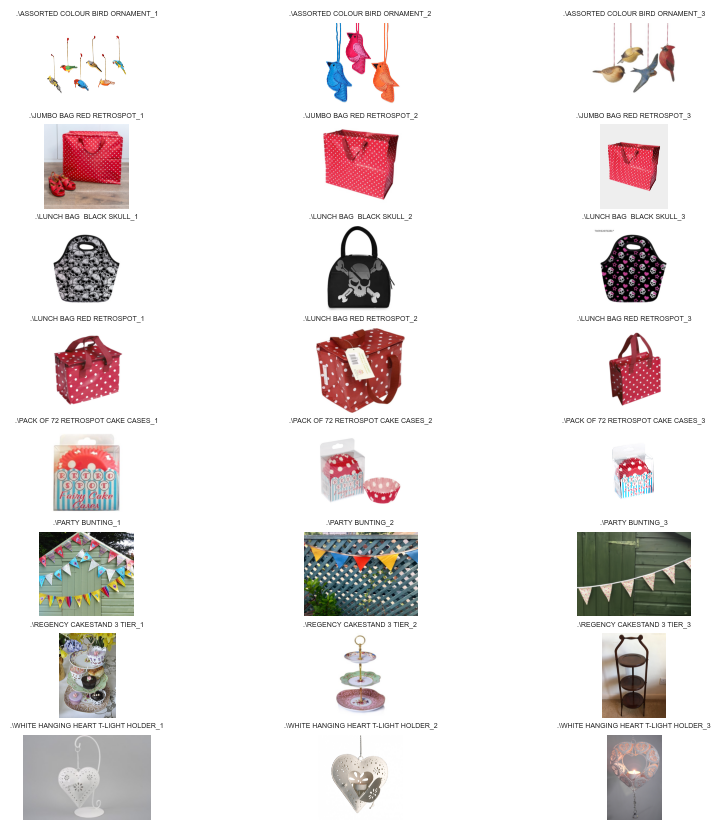

In [22]:
from PIL import Image

plot_num = 1
fig = plt.figure(figsize=(10,13),dpi=100)
for dir in dir_list:
  print(dir)
  cnt = 1
  for pic_path in glob.glob(dir+'/*'):
    ax=fig.add_subplot(10, 3, plot_num)
    ax.axis("off")
    im = Image.open(pic_path)
    plt.title(dir+'_'+str(cnt), fontsize=5)
    plt.imshow(im)
    plot_num = plot_num + 1
    cnt = cnt + 1

これである程度、どんな商品が扱われているかイメージできたのではないでしょうか。

以上で、ウェブスクレイピングの技術を使って、検索エンジンで自分の検索したい検索ワードを指定し、画像検索し、その画像が適切にダウンロードされていることが確認できました。なお、この技術は、アクセス先について、法的な問題等も生じるため、実行したり利用するときは注意しましょう。

### 10.3.2 データ分析する目的とデータ分析ができる範囲

さて、データの話に戻ります。一番重要なのは、この購買データを使って何をしたいか？です。この講義ではあくまで消費者行動分析の基本フレームを身につけてもらう目的で、さまざまなアプローチを紹介して、それらをPythonを実装していきます。ただ、それらは消費者データ分析の型となるもので、すぐに使えるかどうかは別になります。

では、どうすればデータ活用ができるのでしょうか。冒頭にも述べましたが、それはその分析目的や仮説を持って分析をするということです。「このデータから何か面白いことが言えないか」と漠然と考えながら実行するのが悪いとは言いません。無限に時間があるならばそれでいいでしょう。時間を区切って、探索的な目的での分析なら問題はありません。しかし、データを色々といじくりまわしたはいいけれど、結局何がやりたかったのかわからないというケースに陥ることがほとんどです。そのため、「なんのためにこのデータを分析するのか」という視点は忘れないでください。

この講義では具体的に、先ほど述べた優良顧客を「識別」したり、普通の顧客を優良顧客にするという目的だったり、離反しそうな顧客を識別し、適切にアプローチをして離反を防ぐという目的で、分析手法を紹介していきます。

会員カードを作って顧客ロイヤリティを高めたいが、どうやって金額を設定したらいいかわからないので、そのセグメントわけのため分析するというケースもあるでしょう。他、商品のリコメンドだったり、割引が多い商品を購入している顧客もいるかもしれないので、その人にはまだ購入していない商品のクーポンを提供などのアクションもできる可能性もあります。一方、割引しても効果がない顧客もいるので、それはそれでデータとして蓄積して次の判断の材料に使うということもできます。さらに、今回のデータがリアル店舗なら棚の変更などもありますし、従業員を何人雇う必要があるのかという人事視点もあると思います。

別の視点からデータ分析目的を考えると、商品に関して、来月か再来月に各商品やカテゴリー商品の仕入れをどれだけするのか、在庫を持つのか、仕入を減らすのかなど判断する必要が出てきたとします。その時に、この商品は売れていないから減らそうとか、売り上げが上がっているので増やそうなど、意思決定をする場面もあるかと思います。需要予測に関係する問題です。Aという商品の売り上げは減少しており、製品開発の停止の判断をするのではなく、もしかするとそれはイギリスだけの話で、他の国ではニーズがあり、売り上げが徐々に伸びているかもしれないというのがデータからわかるかもしれません。この講義で教わった方法によって、データがあれば、企業ごとや国ごと、地域ごとについて、製品ごとの分析がすぐにできます。

さらに上で述べたデータ戦略をしっかりと考えて、統合的なデータプラットフォームを構築していき、実験と仮説検証を繰り返していけば、より良い意思決定が素早くでき、競合企業他社と差をつけることができるでしょう。

このように様々な目的、データ活用方法が考えられます。ただ、これらの目的において、データ分析ではお客の識別をしたり、商品の売り上げ推移を見ることはできますが、目的に対する施策を考えることだったり、実験することは別です。購買データからヒントとなるようなことを考えることはできても、実際にアクションに繋げないと意味がありません。過去のデータだけでは何もできません。これらは冒頭の「データ分析で重要な3つのこと」で述べた通りで、実務ではその点に注意しながら分析をしていきます。

参考：データ分析をする前の設計をする上で『定量分析の教科書ビジネス数字力養成講座』が参考になります。

### 10.3.3 データの前処理

目的や仮説の検証など定まったら、次はデータのチェックや前処理になります。データ分析の8−9割はモデリング（機械学習や深層学習の実装）のデータ前処理に時間がかかると言われています。こういったことも地味な作業ですが、データ分析をするためには必要な作業になります。

今回の分析対象は、顧客を中心に分析したいため、CustomerIDにデータが入っているレコードのみを対象にします。そして、本データの注意書きとして、カラムのInvoiceNoには数字の前にCがあるものはキャンセルとありますので、一旦このデータを取り除いく処理をしていきます。さらにこのInvoiceNoの先頭文字が数字以外のものも取り除きます。この処理をコーディングしていきます。

ここからはpandasのデータフレームに関する基本的なデータ操作、データのフィルター処理、map関数やlambda関数の処理が理解できていることが前提になります。

以下の処理は、キャンセルCを取り出すために、InvoiceNoの頭文字を取り出し、フラグとして新しいカラムを追加しています。

In [ ]:
online_retail_data_table['cancel_flg'] = online_retail_data_table.InvoiceNo.map(lambda x: str(x)[0])

以下結果を見ると、C以外に5やAの文字もあります。5は通常の購買で、Aはレコードを調べると、「Adjust bad debt」とあり、これも削除してよさそうです。

In [ ]:
online_retail_data_table.cancel_flg.value_counts()

5    532618
C      9288
A         3
Name: cancel_flg, dtype: int64

In [ ]:
online_retail_data_table[online_retail_data_table.cancel_flg=="A"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancel_flg
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,A
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,A
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,A


またデータ情報より、CustomerIDが欠けているものがあるのがわかります。（全体のレコードが約54件non-nullですが、CutomerIDは40万non-nullとなっています。）

In [ ]:
online_retail_data_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   cancel_flg   541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


***

#### 補足事項1：データのコピー

さて以下、データのフィルター処理をしていきますが、後でフィルターしていない状態のデータも使うため、コピーをしてデータをとっておきます。コピーをするときは、以下のようにして実装するので、注意してください。なお、なぜこれを使うかは後の4節で解説をしていきます。

CustomerIDがNullでないレコードを取り出すための前処理をしています。さらに、なお、CustomerIDが小数点になっており少し気持ちが悪いため、int型にデータの型を変換します。

In [ ]:
tmp_online_retail_data_table = online_retail_data_table.copy()
tmp_online_retail_data_table = tmp_online_retail_data_table[(tmp_online_retail_data_table.CustomerID.notnull())]
tmp_online_retail_data_table.CustomerID = tmp_online_retail_data_table.CustomerID.astype(int)
tmp_online_retail_data_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
 8   cancel_flg   406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 31.0+ MB


***

いったん上のデータは置いておいて、以下のように処理したデータをしばらく使っていきます。

以下は、キャンセルされていないレコード（頭文字が5ではじまるもの）かつCustomerIDがNullでないレコードを取り出すための前処理をしています。

In [ ]:
online_retail_data_table = online_retail_data_table[(
    online_retail_data_table.cancel_flg == '5') & (online_retail_data_table.CustomerID.notnull())]

上と同じようにCustomerIDをint型に変更しています。

In [ ]:
online_retail_data_table.CustomerID = online_retail_data_table.CustomerID.astype(int)

In [ ]:
online_retail_data_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  int64         
 7   Country      397924 non-null  object        
 8   cancel_flg   397924 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 30.4+ MB


以上で簡単なデータの前処理は終わります。少し地味な作業かもしれませんし、データの前処理としてさらに大変なケースがあることもあります。しかし、今後のデータ分析の結果に影響を及ぼすため、慎重に実行していきましょう。

#### 練習問題
1.   このデータにおいて、いつからいつまでの期間のデータなのか、UCIにあったデータの説明の通りなのかPythonで実装して結果を確かめてください。
2.   Countryというカラムがありますが、それぞれの国ごとにレコード数をカウントしてください。
3.   それぞれの国ごとに合計売上金額を算出し、ランキング表を作成してください。そして、それを棒グラフにしてみましょう。

注：なお、基本的に練習問題や総合問題のすぐ下に解答が隠されていますが、なるべく展開しないで見ずに取り組んでみましょう。

#### 解答

In [ ]:
print("From {0} to {1}".format(online_retail_data_table.InvoiceDate.min(), online_retail_data_table.InvoiceDate.max()))

From 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [ ]:
online_retail_data_table.groupby(["Country"])["InvoiceNo"].count().sort_values(ascending=False)

Country
United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45


売上合計購買金額カラムを追加します。

In [ ]:
online_retail_data_table['TotalPrice'] = online_retail_data_table.Quantity * online_retail_data_table.UnitPrice

2021-10-08 00:53:43,959 - INFO - numexpr.utils - NumExpr defaulting to 2 threads.


In [ ]:
rank_tp_df = online_retail_data_table.groupby(["Country"])["TotalPrice"].sum().sort_values(ascending=False)
rank_tp_df

Country
United Kingdom          7.308392e+06
Netherlands             2.854463e+05
EIRE                    2.655459e+05
Germany                 2.288671e+05
France                  2.090240e+05
Australia               1.385213e+05
Spain                   6.157711e+04
Switzerland             5.644395e+04
Belgium                 4.119634e+04
Sweden                  3.837833e+04
Japan                   3.741637e+04
Norway                  3.616544e+04
Portugal                3.343989e+04
Finland                 2.254608e+04
Singapore               2.127929e+04
Channel Islands         2.045044e+04
Denmark                 1.895534e+04
Italy                   1.748324e+04
Cyprus                  1.359038e+04
Austria                 1.019868e+04
Poland                  7.334650e+03
Israel                  7.221690e+03
Greece                  4.760520e+03
Iceland                 4.310000e+03
Canada                  3.666380e+03
USA                     3.580390e+03
Malta                   2.7255

上を棒グラフにしたものが以下に表示されています。イギリスがやはり圧倒的に売上が大きいです。

Text(0.5, 0, 'country')

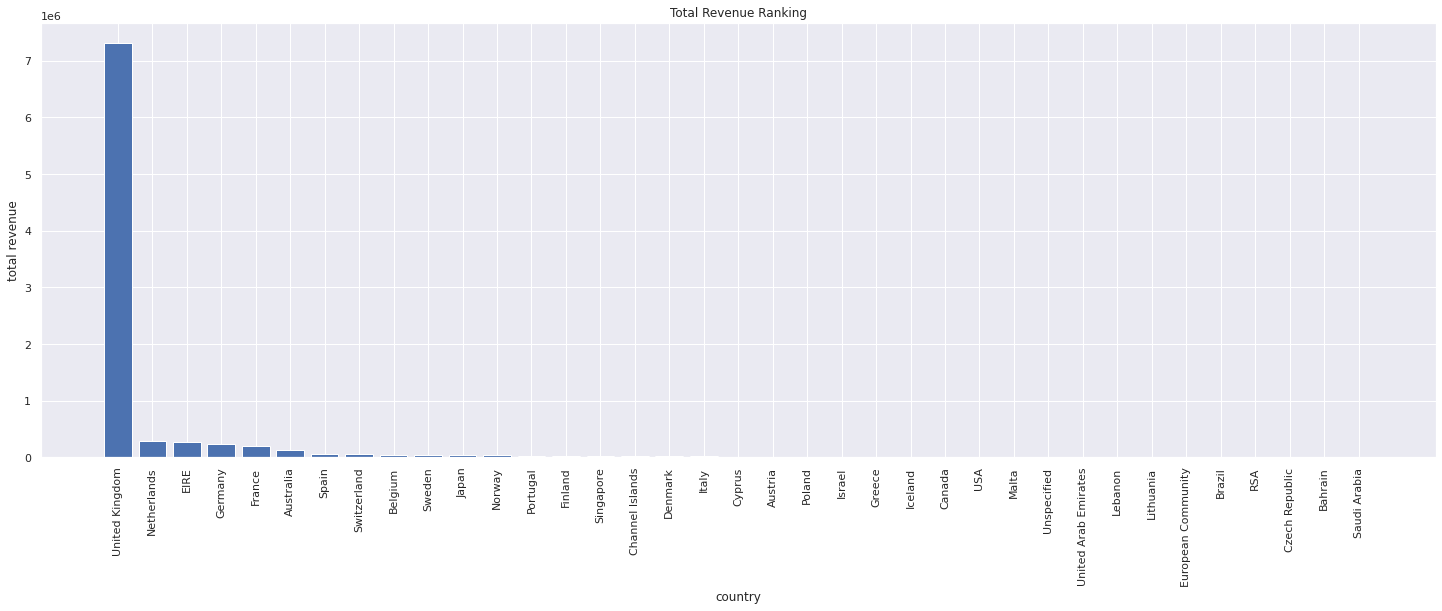

In [ ]:
plt.figure(figsize=(25,8))
plt.xticks(rotation=90)
plt.bar(rank_tp_df.index, rank_tp_df,)
plt.title('Total Revenue Ranking')
plt.ylabel('total revenue')
plt.xlabel('country')

#### 補足事項2：プログラミングでどう実装したらよいかわからない場合の対処方法

プログラミングの基礎をおさえて、ある程度コーディングできるようになっても、方法がわからない、書き方がわからない、という場合もありますし、実装方法を忘れたという時もあるでしょう。そのときは、「検索する」がまずは良いです。本を見るのも大事ですが、載っていないケースもあります。理想は公式ページなどを見るのがいいですが、それは中級者以上の方向けです。公式ドキュメントは初学者にとってわかりにくいです。そして、それをみても何もできずに実装を諦めるよりは、手がかりを見つけるためにキーワードを絞って検索し、何かしら実装していくことも重要です（もちろん、コピペばかりでは実装力は身につきません。）。

そこで、「調べ方」が重要になってきます。キーワードもそうですし、英語が読み書きできる方は英単語で調べるのも情報取得の幅が広がります。また、1つだけの記事を見て判断するのではなく、3−4つほど異なる記事を見た方が良いでしょう。なぜならば、その方法が正しいかわからないですし、もっと良い方法があることもあるからです。もしかすると、便利なライブラリがあるかもしれないです。車輪の再開発を避けるためにも、効率よく実装できるようになりましょう。

## 10.4 データ探索の基本的なアプローチ
キーワード：POSデータの基本的なアプローチ、基礎集計、時系列分析の基礎

### 10.4.1データ基礎集計とチェック

次に、このPOSデータに対する基礎集計や時系列分析をしていきます。データ分析においては、基本的に2つのアプローチがあり、仮説型という冒頭で述べたアプローチと、2つ目は探索型のアプローチです。本節は探索的なアプローチになります。仮説を考えるということは大事と言いつつ、何も前提知識がない状態でそれを実行するのは大変です。そこではじめは探索的にデータを分析をして、そのデータに対する学習のつもりで一部進めるというアプローチも取ることがあります（ただし、冒頭で述べた通り、このアプローチは際限がないため、ある程度設計した上で実行することをお勧めします。理想はこのビジネスドメインに強い方と一緒にやるのが良いです。）

例えば、そもそもこのデータにお客さんが何人いるのか、どんな商品があってどれくらいの種類があるのか、どれだけ買い物があるのかなど、基本的なデータチェックをするのは大事です。さらにそれらの結果と、そのローデータを見ることで、インサイトを得られることもあります。別な発見として、データ分析をしていて、データ上の問題（システム上の問題）があることを見つけることもできるかもしれません。とても地味な作業ですが、後のデータ分析の結果に影響してくるので、注意深く実施していきましょう。

まず、購買顧客のボリュームを確認しましょう。CustomerIDが1顧客（1法人）だとすると、このデータにはどれくらいの法人数がいるでしょうか。ここでは、pandasのメソッドとして　ユニークなカウントをするnuniqueメソッドを使います。

In [ ]:
online_retail_data_table.CustomerID.nunique()

4339

上の結果から、4339の法人がいることがわかります。

次に、どれだけの商品の種類の数があるでしょうか？商品のストックコードベースで先ほどと同じようにカウントしましょう。

In [ ]:
online_retail_data_table.StockCode.nunique()

3665

商品名ベースだと以下のようになり、ストックベースよりも若干多くなっています。これは、なぜでしょうか？　単純にシステム的な問題でしょうか？他の問題があるのでしょうか？直接顧客へのアクションにつながる課題ではないですが、仮説を検証を実装する練習として、後の練習問題で取り組んでいただきます。（ただし、実務的にはこうった問いにすぐに答えられるビジネスのことをよく理解している現場の人がいるため、そういう人に聞いた方が早いです。）

In [ ]:
online_retail_data_table.Description.nunique()

3877

次は、全体としてどれだけ買い物されたか、バスケット数（つまりレシートの数）を計算してみましょう。InvoiceNoの1つのNoで1つのレシートになるイメージです。

In [ ]:
online_retail_data_table.InvoiceNo.nunique()

18536

年間で1万8000以上のバスケット数であることがわかりました。

#### 練習問題1
1.   このデータの中で一番買い物の回数（バスケット数）が多い顧客はどの顧客でしょうか？
2.   このデータの中で合計売上額が最も高い顧客はどの顧客でしょうか？
3.   このデータの中で、一番の売上の個数が多い商品（StockCodeベース）がどれでしょうか？
4.   このデータの中で、合計売上金額が最も高い商品（StockCodeベース）がどれでしょうか？
5.   このデータは、StockCodeベースのユニークカウントより商品名ベースのカウントの方が多かったため、それがなぜか仮説を考えて、実際にそれを確かめるための実装（検証）をしてみましょう。

#### 解答

In [ ]:
cust_invoice_rank_df = online_retail_data_table.groupby(['CustomerID'])['InvoiceNo'].nunique().sort_values(ascending=False)
cust_invoice_rank_df.head(1)

CustomerID
12748    210
Name: InvoiceNo, dtype: int64

In [ ]:
cust_total_p_rank_df = online_retail_data_table.groupby(['CustomerID'])['TotalPrice'].sum().sort_values(ascending=False)
cust_total_p_rank_df.head(1)

CustomerID
14646    280206.02
Name: TotalPrice, dtype: float64

In [ ]:
stock_total_cnt_rank_df = online_retail_data_table.groupby(['StockCode'])['Quantity'].sum().sort_values(ascending=False)
stock_total_cnt_rank_df.head(1)

StockCode
23843    80995
Name: Quantity, dtype: int64

In [ ]:
stock_total_p_rank_df = online_retail_data_table.groupby(['StockCode'])['TotalPrice'].sum().sort_values(ascending=False)
stock_total_p_rank_df.head(1)

StockCode
23843    168469.6
Name: TotalPrice, dtype: float64

さて、商品コードの数と商品名の数が一致しないという問題がありました。これは、同じ商品コードでも異なる商品名がいくつかあるということを意味しています。データに誤りがないという前提の元、考えてみてください。

推測として、「商品名に変更があって、おそらくある時期くらいから名前の変更があるのか」、もしくは「国によって商品名が異なるのか」ということが考えられます。これも簡単に思いつくことでありますが、仮説思考になります。以下の実装で確かめてみましょう。

以下は、Stockコードベースごとにどういった商品名がいくつあるのかそれぞれカウントしています。普通ならば1ですが、複数の商品名があるものは、2以上になります。

In [ ]:
online_retail_data_table.groupby(["StockCode"])["Description"].nunique().sort_values(ascending=False)

StockCode
23236    4
23196    4
23244    3
23131    3
23209    3
        ..
79067    1
79000    1
78124    1
78033    1
10002    1
Name: Description, Length: 3665, dtype: int64

ここでは、例えば、一番上のStockコード23236に注目してみましょう。

In [ ]:
target_stock_df = online_retail_data_table[online_retail_data_table.StockCode==23236]
target_stock_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancel_flg,TotalPrice
218408,556042,23236,DOILEY STORAGE TIN,2,2011-06-08 12:44:00,2.89,14367,United Kingdom,5,5.78
218586,556056,23236,DOILEY STORAGE TIN,1,2011-06-08 13:35:00,2.89,17841,United Kingdom,5,2.89
219658,556106,23236,DOILEY STORAGE TIN,2,2011-06-08 16:54:00,2.89,14056,United Kingdom,5,5.78
220367,556187,23236,DOILEY STORAGE TIN,6,2011-06-09 11:49:00,2.89,15296,United Kingdom,5,17.34
220493,556195,23236,DOILEY STORAGE TIN,6,2011-06-09 12:21:00,2.89,16745,United Kingdom,5,17.34
...,...,...,...,...,...,...,...,...,...,...
534004,581126,23236,STORAGE TIN VINTAGE DOILY,6,2011-12-07 12:43:00,2.89,18272,United Kingdom,5,17.34
534688,581166,23236,STORAGE TIN VINTAGE DOILY,1,2011-12-07 14:43:00,2.89,15525,United Kingdom,5,2.89
534700,581166,23236,STORAGE TIN VINTAGE DOILY,2,2011-12-07 14:43:00,2.89,15525,United Kingdom,5,5.78
534738,581166,23236,STORAGE TIN VINTAGE DOILY,2,2011-12-07 14:43:00,2.89,15525,United Kingdom,5,5.78


全体として、300行くらいのレコードのため、ローデータを全てみてしまいましょう。以下のようにpandasのオプション設定を変更し300行まで表示できるように変更しています。

In [ ]:
pd.set_option('display.max_rows', 300)

以下を見てみると、2011年6月〜8月前半までは「DOILEY STORAGE TIN」という商品名でしたが、それ以降は「STORAGE TIN VINTAGE DOILY」という名前に変更されているように見えます。なお、国によって特に名前の変更はなさそうだというのはわかります。ただし、ここではあくまで推測のため、確かめる情報ソースなどがあれば、確認していくことも必要になります。このようにある程度仮説を持ってデータを絞り込みをしてローデータを見れば、確認できますので、こういった地道な作業もケースバイケースで実施していきましょう。

In [ ]:
target_stock_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancel_flg,TotalPrice
218408,556042,23236,DOILEY STORAGE TIN,2,2011-06-08 12:44:00,2.89,14367,United Kingdom,5,5.78
218586,556056,23236,DOILEY STORAGE TIN,1,2011-06-08 13:35:00,2.89,17841,United Kingdom,5,2.89
219658,556106,23236,DOILEY STORAGE TIN,2,2011-06-08 16:54:00,2.89,14056,United Kingdom,5,5.78
220367,556187,23236,DOILEY STORAGE TIN,6,2011-06-09 11:49:00,2.89,15296,United Kingdom,5,17.34
220493,556195,23236,DOILEY STORAGE TIN,6,2011-06-09 12:21:00,2.89,16745,United Kingdom,5,17.34
220496,556196,23236,DOILEY BISCUIT TIN,6,2011-06-09 12:27:00,2.89,18065,United Kingdom,5,17.34
220640,556205,23236,DOILEY STORAGE TIN,6,2011-06-09 13:37:00,2.89,15827,United Kingdom,5,17.34
220648,556206,23236,DOILEY BISCUIT TIN,6,2011-06-09 13:46:00,2.89,14911,EIRE,5,17.34
221696,556263,23236,DOILEY STORAGE TIN,2,2011-06-09 18:41:00,2.89,13969,United Kingdom,5,5.78
221917,556290,23236,DOILEY STORAGE TIN,6,2011-06-10 09:23:00,2.89,17088,United Kingdom,5,17.34


#### 補足事項1：ローデータを見ることの大切さ

さて、ここで注意しておかなければいけないことがあります。この補足でもローデータを見ることの説明をしていきます。

ここでの売上合計金額のランキング1位はStockCodeは「23843」でした。これだけを見て、この商品はいますごく人気があり、いますぐ在庫を増やすべきだといえるでしょうか？この購買に関するレコードを見てみます。

In [ ]:
online_retail_data_table[online_retail_data_table.StockCode==23843]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancel_flg,TotalPrice
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,5,168469.6


なんと、1つの法人だけでこの「PAPER CRAFT , LITTLE BIRDIE	」を80,995個も購入しているというのがデータ上わかりました。

さて、ここで違和感を覚える人がほとんどだと思います。数値だけをみていると「たくさん買ったんだなあ」と思う人もいるかもしれませんが、実務的、ビジネス的に考えて「この人は間違って注文したんじゃないだろうか？もしくは何かシステム的に何か問題があったのではないか」と考えるのが普通です。

さて、どうすればよいでしょうか？これを確かめる方法はどうすれば良いでしょうか？まずは考えてみてください。

ここで、データの前処理に何か問題があったかもしれないと思うのが、データ分析する上でも重要です。データ分析は前に戻ってデータの取得から確認していくこともしばしばあります。これをいきなり見つけるのは困難なので、気がついた時に戻ることができるというのも大事です。

先程、tmp_online_retail_data_tableとしてデータ加工処理前のデータを取っておきました。これを使って、もう一度、商品コード23843のレコードを見てみましょう。

In [ ]:
tmp_online_retail_data_table[tmp_online_retail_data_table.StockCode==23843]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancel_flg
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,5
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom,C


上の２レコードのデータから、「1つ目のInvoice581483の購買に対して、2つ目のC581484によって同じ量だけキャンセルされている」というのがわかります。これはInvoiceNoが581484に対するキャンセルであれば、はじめに実施したような前処理方法で問題ありません。しかし、581483に対するキャンセルであれば、581483は間違えた注文のため、これも削除する必要があります。

Cancelされたデータをさらっと見てみることにしましょう。

In [ ]:
tmp_online_retail_data_table[tmp_online_retail_data_table.cancel_flg=="C"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancel_flg
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,C
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,C
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,C
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,C
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,C
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,C
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom,C
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,C
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,C


いくつか顧客をピックアップしながらデータを見ることにします。CustomerIDが17548の人を見てみましょう。

In [ ]:
tmp_online_retail_data_table[(tmp_online_retail_data_table.CustomerID==17548)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancel_flg
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,C
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,C
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,C
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,C
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548,United Kingdom,C
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,C
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548,United Kingdom,C
165024,550755,22585,PACK OF 6 BIRDY GIFT TAGS,24,2011-04-20 12:01:00,1.25,17548,United Kingdom,5
165025,550755,22082,RIBBON REEL STRIPES DESIGN,10,2011-04-20 12:01:00,1.65,17548,United Kingdom,5
165026,550755,22081,RIBBON REEL FLORA + FAUNA,10,2011-04-20 12:01:00,1.65,17548,United Kingdom,5


上のデータを眺めてみると、いきなりキャンセルのデータがあります。しかし、このデータ、2010年12月からしかデータがなかっため、その前に購入されたものがキャンセルされたかもしれません。そして、2011年4月20日にいくつか買い物がされておりますが、2011年5月6日にいくつかの商品についてキャンセルレコードがあります。その前の4/20に買い物されたデータと照らし合わせると、全く同じになっています。これはInvoiceNoが552049に対してされたわけでなく、その前に購入されたもの（InvoiceNoが550755）に対してキャンセルされたレコードであることが言えそうです。

他、いくつかみていくと同じようなデータ構造になっており、厳密には、はじめの前処理は適切ではないかもしれないと考える必要も出てきます。ここでこのキャンセルデータを消し込むための処理をやるという方法もありますが、先程のデータ前処理よりは処理として難しくなります。これがデータの前処理が8割といわれる理由です。データ分析をしない人には、データ前処理の大変さはなかなか理解してもらえず、派手さがないですし、時間ばかりが取られるため、大変なこともあります。しかし、コツコツやっていくしかないのです。こういった課題は、AIは解決してくれません。これはシステム的な問題でもあり、その原因を追求し、ログ吐き出しの仕様変更を要求するなど別の解決策を検討する必要もあります。簡単に処理できるプログラムなら良いですが、注文とそれに対するキャンセルのキーが紐付かないというのは、システムのログの吐き出しに問題があるため、根本原因を修正していくことが第一で、下手に頑張る必要はありません。

この講義では、あくまで消費者分析の基本的な手法を学んでもらうという場であり、データの前処理についての本格的な講義ではないのと、レコードの数としては40万あるうちの9000もないため、少し気持ち悪いですが、一番初めのデータの前処理のまま進めていきます。ただし、もちろん、実務的にはキャンセルされた注文を消し込む作業も必要なため、それを具体的にどう対処するかは、最後の総合問題としてやっていただくことにします。

さて、データ前処理の話から一旦離れて、また売り上げランキングの視点で考えてみましょう。2位の「REGENCY CAKESTAND 3 TIER（StockCodeが22423）」をみていくと、以下のようなレコードになっているのがわかります。

In [ ]:
online_retail_data_table[online_retail_data_table.StockCode==22423]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancel_flg,TotalPrice
880,536477,22423,REGENCY CAKESTAND 3 TIER,16,2010-12-01 12:27:00,10.95,16210,United Kingdom,5,175.20
936,536502,22423,REGENCY CAKESTAND 3 TIER,2,2010-12-01 12:36:00,12.75,16552,United Kingdom,5,25.50
1092,536525,22423,REGENCY CAKESTAND 3 TIER,2,2010-12-01 12:54:00,12.75,14078,United Kingdom,5,25.50
1155,536528,22423,REGENCY CAKESTAND 3 TIER,1,2010-12-01 13:17:00,12.75,15525,United Kingdom,5,12.75
1197,536530,22423,REGENCY CAKESTAND 3 TIER,1,2010-12-01 13:21:00,12.75,17905,United Kingdom,5,12.75
...,...,...,...,...,...,...,...,...,...,...
538944,581425,22423,REGENCY CAKESTAND 3 TIER,1,2011-12-08 15:31:00,12.75,14796,United Kingdom,5,12.75
539891,581449,22423,REGENCY CAKESTAND 3 TIER,1,2011-12-08 17:37:00,12.75,12748,United Kingdom,5,12.75
539892,581449,22423,REGENCY CAKESTAND 3 TIER,1,2011-12-08 17:37:00,12.75,12748,United Kingdom,5,12.75
540216,581472,22423,REGENCY CAKESTAND 3 TIER,2,2011-12-08 19:55:00,12.75,15796,United Kingdom,5,25.50


1位の「PAPER CRAFT , LITTLE BIRDIE 」とは異なり、「REGENCY CAKESTAND 3 TIER」は1724レコードあり、以下の集計結果から、881法人からの購入があったのがわかります。そのため、幅広くさまざまな法人から商品が買われているのは、「REGENCY CAKESTAND 3 TIER」の方だとわかります。

In [ ]:
online_retail_data_table[online_retail_data_table.StockCode==22423].CustomerID.nunique()

881

さらに、上のデータを眺めてみると、同じ商品でもUnitPriceが異なることもあり、これは値引きか何かをされたのかもしれないというのが推測されます。このデータを使った何をするかは、目的によりますが、価格の最適な設定を考える材料になるかもしれません。価格の設定については、本章の趣旨（顧客の識別）とは少し外れるため、中級編で少し紹介していきます。

In [ ]:
online_retail_data_table[online_retail_data_table.StockCode==22423].UnitPrice.value_counts()

12.75    1401
10.95     309
24.96      10
4.00        2
5.00        1
0.00        1
Name: UnitPrice, dtype: int64

なお、繰り返しのポイントになりますが、こういった場面で1つ1つのデータを見ることで単純な集計結果や分析からだけでは得られないものもあるため、適宜ローデータをみるというのも忘れないようにしてください。

#### 補足事項2：どのような指標を使って、商品売り上げの比較をするのか？

ここでは、分析目的として、それぞれの国ごとに扱う商品を変更するかを考えることになり、たとえば、さきほどの商品コード22423について着目することになったとしましょう。この商品、イギリスとドイツどちらで売れていると言えるでしょうか？　（なお、本件はECサイトなので、あまりこういう視点で考えないかもしれませんが、店頭購買分析では、店舗ごとの比較として扱うこともあります）

もちろん、金額的にはイギリスの方が大きいとは予測できますが、果たしてそれでその商品がイギリスで人気があるといって良いのでしょうか。もちろん、イギリスの方がもともと買い物する人数が多いので、どの商品も売上が多く出るのが当たり前です。

分析では「アップルtoアップル」といい、ちゃんと比較対象を揃えましょうという原則があります。ここでは、そのアプローチとして店頭マーケティングの分析によく使われるPI値を紹介します。PIとは、Purchase Incidenceの略で、来店客数の異なる店舗におけるターゲット商品の売上を比べる場合に使われる指標になります。なお、厳密には来店客数を分母に持ってきますが、今回はECサイトにおけるPOSデータで、それに対応するデータを作成したいため、全体のバスケット数を来店顧客数とみなして、計算していくことにします。

以下は各国ごとのバスケット数になります。もちろん、イギリスが一番多くの買い物があります。

In [ ]:
country_incnt_rank_df = online_retail_data_table.groupby(["Country"])["InvoiceNo"].nunique().sort_values(ascending=False)
country_incnt_rank_df

Country
United Kingdom          16649
Germany                   457
France                    389
EIRE                      260
Belgium                    98
Netherlands                95
Spain                      90
Australia                  57
Portugal                   57
Switzerland                51
Finland                    41
Italy                      38
Norway                     36
Sweden                     36
Channel Islands            26
Japan                      19
Poland                     19
Denmark                    18
Austria                    17
Cyprus                     16
Unspecified                 8
Iceland                     7
Singapore                   7
Canada                      6
USA                         5
Malta                       5
Greece                      5
Israel                      5
Lithuania                   4
European Community          4
United Arab Emirates        3
Czech Republic              2
Bahrain                     2
Sa

次に、商品コード22423のそれぞれの国におけるトータル売上金額を算出しています。やはり、イギリスが1位になっています。

In [ ]:
country_total_rank_df = online_retail_data_table[online_retail_data_table.StockCode==22423].groupby(["Country"])["TotalPrice"].sum().sort_values(ascending=False)
country_total_rank_df

Country
United Kingdom          110990.20
Germany                   9061.95
EIRE                      7388.55
Netherlands               3166.35
France                    2816.85
Spain                     2049.00
Australia                 1978.20
Switzerland                924.15
Belgium                    599.25
Israel                     551.10
Channel Islands            517.80
Cyprus                     382.50
Norway                     357.00
Portugal                   328.20
Iceland                    191.25
Brazil                     175.20
Greece                     175.20
Singapore                  175.20
Lebanon                    153.00
United Arab Emirates       153.00
USA                        114.75
Malta                       89.25
Italy                       76.50
Austria                     51.00
Finland                     38.25
Bahrain                     25.50
RSA                         25.50
Unspecified                 25.50
Canada                      12.75
Name: 

次に、先程のPI値もどき？を計算するため、上二つのデータをマージします。この辺はpandasの機能をフル活用していますので、不安がある方は、pandasの復習をしっかりしましょう。

In [ ]:
merge_country_df = pd.concat([country_incnt_rank_df,country_total_rank_df]
                              , axis=1
                              , join='inner')
merge_country_df.columns = ['cnt', 'totalP']
merge_country_df

,cnt,totalP
Country,,
United Kingdom,16649,110990.20
Germany,457,9061.95
France,389,2816.85
EIRE,260,7388.55
Belgium,98,599.25
Netherlands,95,3166.35
Spain,90,2049.00
Australia,57,1978.20
Portugal,57,328.20


上のデータから、国ごとの購買金額とバスケット数があるため、以下のようにPI値もどきを計算し、ランキングを見るためソートします。（PI値は、レジ通過客1000人あたりの購買指数のため、1000をかけています。）

In [ ]:
merge_country_df['PI'] = merge_country_df.totalP / merge_country_df.cnt * 1000
merge_country_df.PI.sort_values(ascending=False)

Country
Brazil                  175200.000000
Lebanon                 153000.000000
Israel                  110220.000000
United Arab Emirates     51000.000000
Greece                   35040.000000
Australia                34705.263158
Netherlands              33330.000000
EIRE                     28417.500000
Iceland                  27321.428571
RSA                      25500.000000
Singapore                25028.571429
Cyprus                   23906.250000
USA                      22950.000000
Spain                    22766.666667
Channel Islands          19915.384615
Germany                  19829.212254
Switzerland              18120.588235
Malta                    17850.000000
Bahrain                  12750.000000
Norway                    9916.666667
France                    7241.259640
United Kingdom            6666.478467
Belgium                   6114.795918
Portugal                  5757.894737
Unspecified               3187.500000
Austria                   3000.000000
Cana

上の結果から、この商品のPI値は、イギリス（United Kingdom）は6666でドイツは19829となり、ドイツの方が売れていることがわかります。

他、ここから得られるインサイトとして、この商品は特にブラジルで買われているというのがわかりますが、そもそものバスケットの数が少ないので、参考程度に見ておきましょう。そして、フィンランドがPI値として一番小さくなりました。この商品は、「REGENCY CAKESTAND 3 TIER」で、画像からするとアフタヌーンティーでよく使われる商品だと思います。ネット上で色々と情報を調べてみるとフィンランドでは、紅茶よりコーヒーが主流で、アフタヌーンティーは(2010年前半は)まだまだ多くないというのがわかりました。その習慣が原因でギフトする機会もなく、この商品のPI値が低く出ているのかもしれませんが、これもあくまで推測のため、参考情報としてみてください。

参考：ランキングもrankメソッドを使えばつけることができます。ここでは後の処理で使わないため、実装の紹介は割愛します。

#### 練習問題2
1.   他の商品でPI値を算出してみましょう。

（解答略）

### 10.4.2 基礎的な時系列分析

さて今までは全体のデータに対する金額の合計で話をしてきました。しかし、上の基礎集計分析だけだと、傾向として、全体的な売上が上がっているのか、それとも下がっているのかわかりません。１断面でしかないからです。そこで次の目的として、どういった売り上げ傾向になっているのか時間軸によるパターンを把握するために、月毎や日毎の売り上げを時系列のグラフにします。

pandasのフレームワークで時系列として分析をしやすいように、日時をインデックスに指定します。


In [ ]:
online_retail_data_table.set_index(['InvoiceDate'],inplace=True)

以下は売上金額について、月毎に算出するため、pandasのメソッドresampleを使って、パラメータとしてMを指定しています。この辺りもpandasの復習になります。

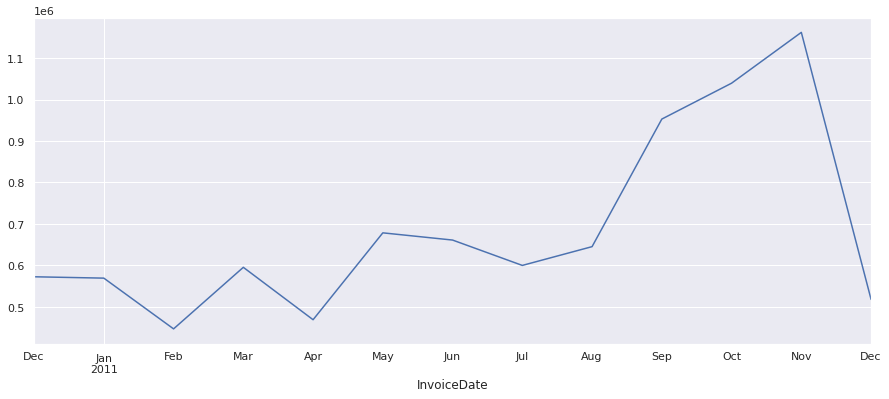

In [ ]:
online_retail_data_table['TotalPrice'].resample('M').sum().plot(figsize=(15,6))

これをみると、スタート時点から徐々に売り上げが伸びていき、2011年の11月にピークが来ているようです。なお、当たり前ですが、2011年12月は売り上げが下がっているわけではなく、期間が途中までしかないので、これだけでは12月の売り上げが下がっているとは言えません。

次は、日毎の売り上げをみてみます。

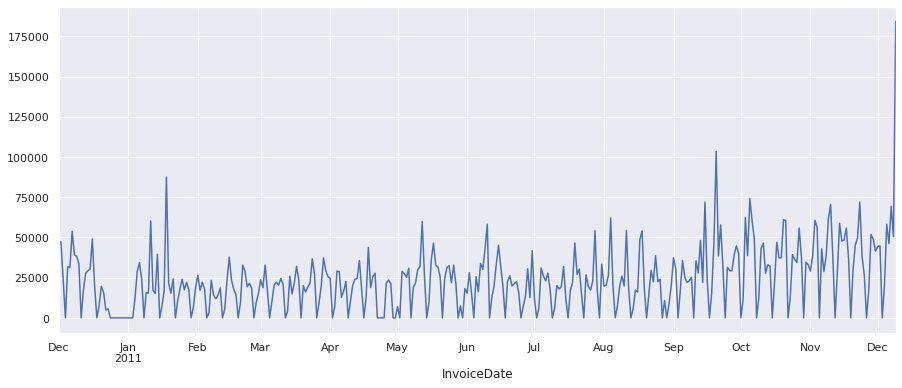

In [ ]:
online_retail_data_table['TotalPrice'].resample('D').sum().plot(figsize=(15,6))

これを見ると、売上にある程度周期性があるのではないかということがわかります。さらに、2011年1月の中頃、2011年9月後半、2011年12月前半に売上が跳ねています。何かキャンペーンをやったのか、たまたまそういうお客さんがいたのか等、このデータからはわかりませんが、さらに期間指定等を指定して、その時の売上ランキングを調べたり、売上の要因分解をしていくなど、データを詳しくみていくことも大事です。2011年12月前半の跳ね上がり方については、先程ローデータを見てお分かりのように、間違って注文したデータが入っていることが推測されます。

以上で、このPOSデータを使った簡単な基礎集計や時系列の傾向の見方についての紹介は終わりになります。

探索的な分析アプローチとして、他にも統計的なアプローチ（記述統計学）を実施して、各商品売上や数量の平均、分散を算出したり、箱ひげ図ヒストグラムを作成したりすることもありますが、本章は記述統計学の講座ではないので割愛します。もしこの辺の知識に不安がある方は、対象データは異なりますが、松尾研究室で提供しているデータサイエンスのコンテンツを見るか、記述統計学の基本的な書籍を見て、確認してください。

#### 練習問題
1.   上記のデータに対して、売上合計を1時間ごとに算出してグラフにしてみましょう。
2.   さらにその中で一番売り上げが高い時間帯を抽出して、何が一番売れているのか、それをどの顧客が買ったのか調査してみましょう。


#### 解答

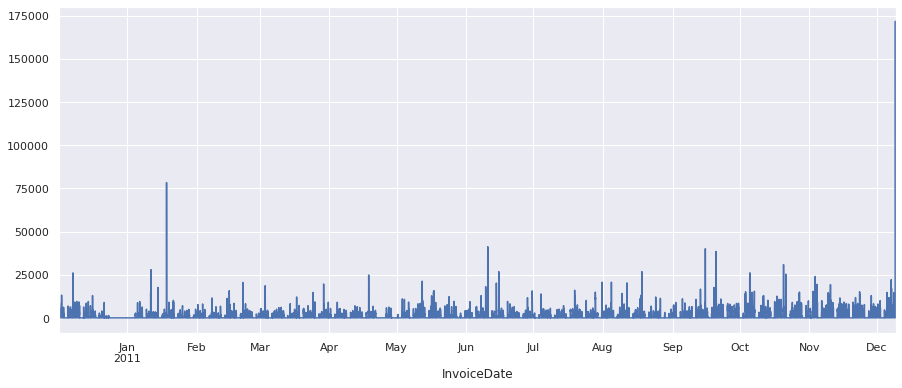

In [ ]:
online_retail_data_table['TotalPrice'].resample('H').sum().plot(figsize=(15,6))

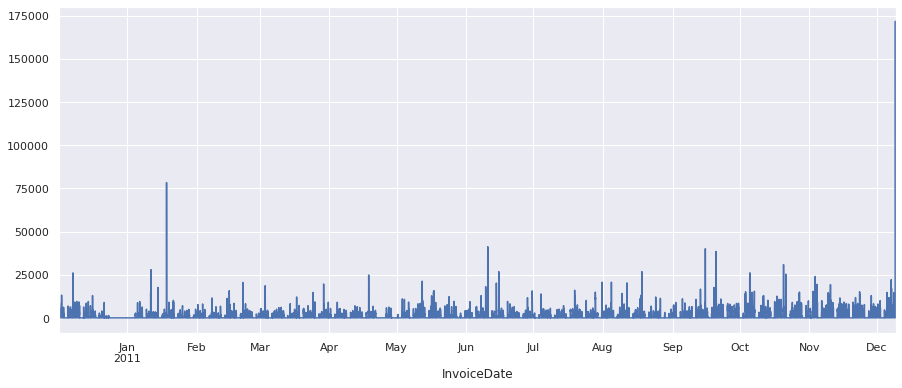

In [ ]:
online_retail_data_table['TotalPrice'].resample('H').sum().plot(figsize=(15,6))

In [ ]:
online_retail_data_table['TotalPrice'].resample('H').sum()[online_retail_data_table['TotalPrice'].resample('H').sum().max() == online_retail_data_table['TotalPrice'].resample('H').sum()]

InvoiceDate
2011-12-09 09:00:00    171679.08
Freq: H, Name: TotalPrice, dtype: float64

以下は、2011年12月9日の9時のデータに絞り込んでいます。こういったフィルターの仕方ができるので、pandasの機能は便利です。

In [ ]:
online_retail_data_table["2011-12-09 09"]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,cancel_flg,TotalPrice
InvoiceDate,,,,,,,,,
2011-12-09 09:00:00,581479,22087,PAPER BUNTING WHITE LACE,10,2.95,17364,United Kingdom,5,29.50
2011-12-09 09:07:00,581480,23463,VINTAGE ZINC WATERING CAN,2,9.95,14441,United Kingdom,5,19.90
2011-12-09 09:07:00,581480,23464,VINTAGE ZINC WATERING CAN SMALL,4,4.95,14441,United Kingdom,5,19.80
2011-12-09 09:07:00,581480,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,10,2.08,14441,United Kingdom,5,20.80
2011-12-09 09:07:00,581480,84029E,RED WOOLLY HOTTIE WHITE HEART.,8,4.25,14441,United Kingdom,5,34.00
2011-12-09 09:07:00,581480,22633,HAND WARMER UNION JACK,12,2.10,14441,United Kingdom,5,25.20
2011-12-09 09:07:00,581480,23355,HOT WATER BOTTLE KEEP CALM,12,4.95,14441,United Kingdom,5,59.40
2011-12-09 09:07:00,581480,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,12,4.25,14441,United Kingdom,5,51.00
2011-12-09 09:07:00,581480,22112,CHOCOLATE HOT WATER BOTTLE,6,4.95,14441,United Kingdom,5,29.70


上の結果から一番売り上げが高い商品コードは23843で、それを買った顧客IDは16446であることがわかります。この結果は以前にもみましたが、上のデータからもこの顧客はこの商品だけの購入で80995個も購入していますが、これはキャンセルされているのではと推測しているのでした。

In [ ]:
online_retail_data_table[online_retail_data_table.StockCode==23843]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,cancel_flg,TotalPrice
InvoiceDate,,,,,,,,,
2011-12-09 09:15:00,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2.08,16446,United Kingdom,5,168469.6


なお、後の処理のため、一旦インデックスはリセットします。

In [ ]:
online_retail_data_table.reset_index(inplace=True)

参考：pandasにはpandas_profilingというデータフレームに対して自動的に簡易なデータ解析結果をHTML形式で出力してくれる機能があります。ただし、今回のデータはトランザクションデータのため、そのまま入れて実行するよりも、ある程度データを絞り込んだり、加工処理したあとでpandas_profilingを使うと意味のある結果が得られるかもしれません。（なお、インデックスをリセットしないとエラーになるので注意しましょう。）

In [ ]:
# 最新版でないとエラーがでるため、最新版をインストールします。
!pip install -U pandas_profiling

     |████████████████████████████████| 261 kB 5.1 MB/s 
     |████████████████████████████████| 62 kB 915 kB/s 
     |████████████████████████████████| 675 kB 47.3 MB/s 
     |████████████████████████████████| 636 kB 45.3 MB/s 
     |████████████████████████████████| 102 kB 11.2 MB/s 
     |████████████████████████████████| 10.1 MB 49.2 MB/s 
     |████████████████████████████████| 3.1 MB 44.0 MB/s 
     |████████████████████████████████| 812 kB 74.6 MB/s 
     |████████████████████████████████| 28.5 MB 49 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=214adc382438bde9838dec947de39da58e997953cd99b449e8a05845e0484131
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=e75544d964f7c0481f5808e52f65a59a9979f1a5ded30fee0d90c4b74864071e
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e

In [ ]:
import pandas_profiling as pdp
profile = pdp.ProfileReport(online_retail_data_table)
profile.to_file(output_file="online_retail_data_table.html")

2021-10-08 00:54:13,782 - INFO - visions.backends - Pandas backend loaded 1.1.5
2021-10-08 00:54:13,792 - INFO - visions.backends - Numpy backend loaded 1.19.5
2021-10-08 00:54:13,796 - INFO - visions.backends - Pyspark backend NOT loaded
2021-10-08 00:54:13,798 - INFO - visions.backends - Python backend loaded


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 10.5 CRMデータの基礎分析手法
キーワード：STP、デシル分析、パレートの法則、ABC分析、RFM分析、離反分析、LTV分析

前節までは、CRM（ここではPOS）データについての基本的なデータチェック、基礎集計、基礎分析を行ってきました。もちろん、これだけでは何も顧客に対してアクションを起こせないので、この節からは、マーケティングの戦略でもよく出てくるSTPを説明した後に、その分析アプローチであるデシル分析、RFM分析などについて学び、それを自分の手を使って実装できることを目指します。

ただし、ここではあくまで分析フレームの基本型であるので、本来考えるべきは、冒頭の方でも述べた通り、データを使って何がしたいかであり、目的をはっきりさせることです。この5節では、あくまで「顧客を識別して、その顧客を抽出し、それぞれのアプローチを考える材料にする」という目的で、実装していきます。

もし、目的がなかなか定まりそうでなければ、冒頭で述べた３つのポイント（仮説、因果、比較）を意識しながら取り組んでみてください。これらを実行するためのスキルは、Pythonを使って実装したり、データ分析するというよりも、ロジカルシンキングにあたるフレームワークのため、そういった思考を身につけたい方には以下のような本がおすすめです。

参考：

『グロービスMBAクリティカル・シンキング』

『グロービスMBAマーケティング』

### 10.5.1 STPとは

さて、ここではマーケティングの戦略の話から再び考えます。マーケティングの本で必ずといっていいほど紹介されているSTPについて紹介します。STPとは、Segment、Targeting、Positioningの3つの頭文字からくる言葉です。次に、なぜこのSTPをやる必要があるのでしょうか。これは冒頭でも触れた通り、顧客の市場というのは全て同じではなく、同じようにアプローチしてもその人に対するメッセージ性が薄れてしまいます。そこで顧客をしっかりと識別し、優良顧客を定めたり、潜在的なお客様を見つけたり、離反しそうなお客様に対してその原因を探して対策を練るというように、各セグメントごとに各適切なアプローチを実施していくことが重要になります。

それが、セグメントとターゲティングの話になります。本来セグメントは、POSデータ以外にも属性データや地理的変数や心理的な変数など様々な変数を使って分けていくことのですが、今回はPOSデータしかないため、POSデータから実施可能な軸でセグメントを分ける方法（デシル分析やRFM分析など）を解説します。

なお、最後3つ目のポジショニングは、ターゲットで定めた顧客グループに対して、企業の製品やサービスをどうやって認知させるか、欲しいと思わせるかというアプローチです。顧客がなぜ自社の製品を選んだのかその決定的な要因となるものを分析するための方法もありますが、リサーチや顧客アンケート分析の話になります。今回のPOSデータだけで分析するのは難しいですが、興味ある方は、多変量解析、因子分析や構造方程式というキーワードで調べてみてください。

### 10.5.2 デシル分析とは

上では、顧客セグメントして、優良顧客を探すという話をしました。さて、一言で「優良顧客」といっても、何が優良なのかは、業界や企業によって定義が異なると思いますし、人によって違うイメージを持つでしょう。

まず「優良顧客」といえば、１つの軸として「使ってくれる金額」があります。「お金をたくさん使ってくれるお客さんが優良顧客」ということはいえると思います。ただ、お金をたくさん使うと言ってもどれくらい使うのか、どの閾値で切ったらいいのかわからないこともあると思います。ここで紹介するデシル分析では、すべての顧客に対して、購入金額が高い順に並べて10等分して、その売上構成比率を分析する手法で、たとえば上位2つのグループを優良顧客であると定義したりします。

なぜこういった分析をするかというと、優良顧客を見つけるための1つの軸になるからです。優良顧客を識別して、そうでない顧客とサービスの提供等に差をつけて、優良顧客にさらにファンになってもらうのが企業にとっては嬉しいわけです。年間に10円しか使っていないお客様と1000万円以上使っているお客様とで同一の扱いをするのは、たくさん買い物をしているお客様のロイヤリティも下がりますし、さらにサービス利用継続という意味でも、長く続かない可能性もでてきます。

もちろん、現実的には、顧客の識別や優良顧客を売上金額だけの軸で判断できないこともありますし、規制上そうしてはいけないサービス領域もあったりします。後で紹介するRFM分析など、売上金額軸のほかに異なる軸を加えることで、よりそのセグメントにあったメッセージを届けることができ、より良いサービスを提供できる可能性が広がります。

ここでは、まずセグメントを切る基本的なお作法として、デシル分析を身に付けていただきます。まず、上の練習問題で解いた以下のデータを使います。顧客ごとの売上ランキングでした。

In [ ]:
cust_total_p_rank_df.head()

CustomerID
14646    280206.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    143825.06
Name: TotalPrice, dtype: float64

10等分するには、pandasのqcutを使います。pandasの復習になりますので、全くわからない方はpandasの復習をしてください。

In [ ]:
q_ten_cust_price_df = pd.qcut(cust_total_p_rank_df, 10)
q_ten_cust_price_df

CustomerID
14646    (3646.164, 280206.02]
18102    (3646.164, 280206.02]
17450    (3646.164, 280206.02]
16446    (3646.164, 280206.02]
14911    (3646.164, 280206.02]
                 ...          
17956        (-0.001, 156.566]
16454        (-0.001, 156.566]
14792        (-0.001, 156.566]
16738        (-0.001, 156.566]
13256        (-0.001, 156.566]
Name: TotalPrice, Length: 4339, dtype: category
Categories (10, interval[float64]): [(-0.001, 156.566] < (156.566, 250.106] < (250.106, 351.658] <
                                     (351.658, 489.724] ... (941.942, 1353.74] < (1353.74, 2057.914] <
                                     (2057.914, 3646.164] < (3646.164, 280206.02]]

ここで、区分された10つのグループについて、それぞれの人数をカウントして10等分されていくことを確認してみましょう。pandasのvalue_counts()メソッドを呼び出して、インデックスで昇順に並べてみます。

In [ ]:
q_ten_cust_price_df.value_counts().sort_index()

(-0.001, 156.566]        434
(156.566, 250.106]       434
(250.106, 351.658]       434
(351.658, 489.724]       434
(489.724, 674.45]        434
(674.45, 941.942]        433
(941.942, 1353.74]       434
(1353.74, 2057.914]      434
(2057.914, 3646.164]     434
(3646.164, 280206.02]    434
Name: TotalPrice, dtype: int64

上の表の見方としては、売上合計156ポンド（この時期ユーロ扱いだったかもしれませんが、一旦決めでポンドにします。）までの法人が434法人、次のグループは156ポンドから250ポンドまでが434法人、、、というように均等に分かれているのがわかります。

#### 練習問題1
1.   パレートの法則（上位2割の顧客が売上の8割を占めているのかどうか）を確かめてください。

#### 解答

In [ ]:
q_ten_cust_price_df = pd.qcut(cust_total_p_rank_df, 10, labels=['01','02','03','04','05','06','07','08','09','10'])

In [ ]:
merge_cust_df = pd.concat([cust_total_p_rank_df,q_ten_cust_price_df]
                              , axis=1
                              , join='inner')
merge_cust_df.columns = ['TotalPrice','Group']

In [ ]:
pd.DataFrame(merge_cust_df.groupby(["Group"])['TotalPrice'].sum() / merge_cust_df['TotalPrice'].sum()).cumsum() * 100

,TotalPrice
Group,
01,0.515566
02,1.493475
03,2.976045
04,4.994334
05,7.832286
06,11.690177
07,17.208426
08,25.382863
09,38.624934


上の結果からセグメントグループ1から8までの売上合計割合が25%となっていることがわかります。そして、上位2割のセグメントグループ9と10で約75%となることがわかるため、ある程度パレートの法則が成り立っていることがわかります。

#### 補足事項1： セグメントに分けた後とその活用事例（実験計画）

この分析をした後は、それぞれのセグメント(1から10)のグループに対して、それぞれどのようにアプローチや施策をしていくか、そのアクションまで検討する必要があります。それぞれのグループは異なる顧客像として異なるので、それぞれアプローチを変えるのが一般的です。以下のRFM分析などにも同じことが言えます。

ここで、具体的には、営業リストとしてこのセグメント結果が提供された場合を考えてみましょう。

優良顧客であれば、なるべくコミュニケーションを多くしたり、有益な情報等を提供するのが一般的です。セグメントに分けてから、それぞれのセグメントに対する施策を決めます。ただ、最終的にその施策等を実行する段階になって、担当の営業の人が1つ1つみて、判断する必要がある場合もあります。

もっと実務的には、某金融機関や某マーケティング企業では、以下で記載するRFM分析に近いことをやっており、そのセグメントを分けた後は、顧客グループによって、優先順位をつけてアプローチしたり、提供するサービスや情報提供を変化させて、その後のアクションがどうなったかなど検証するなどしています。（ただ、対象顧客が数百万人か数千万人単位のため、システム処理しているケースがほとんです。）


実験計画ともいわれ、実際にあるセグメントの中で施策をテストするテストグループ、テストしないコントロールグループに分けて、施策検証を実施します。冒頭で述べたABテストのようなもので、検証の効果測定をテストグループとコントロールグループのアップリフトを計算し、その施策の効果検証を実施します。

具体的には、セグメント1にはほとんど買ってもらえていないので、50％割引のキャンペーンを紹介する、セグメント10は買ってもらえているので違うサービス（何かの旅行券、プレゼント、情報提供など）をするなど変更していきます。ただ、それが効果があるかどうかがわからないため、「実験」をしなければいけません。その結果を検証し、はじめてPDCAがまわせるのです。

ただし、コントロールが取れない場合もあったり、法律や規制上、顧客に対するサービスを変更することが難しい場合もあります。コントロールが取れない場合のアプローチや厳密な施策検証方法については、因果推論、探索の話になるため、次のコンテンツの中級編にて少し紹介していきます。

#### 補足事項2： デシル移動の分析

ここでデシル分析はあくまで1段面のみでの集計でした。しかし、いつもセグメント10の最上位優良顧客がずっとセグメント10にいるとは限りません。また何か施策やサービスの向上によって、あるセグメント3がランクアップして別のセグメント5くらいまで移動させたいという事業者の意向もあるかもしれません。

これを分析するために、2つの期間におけるデシルセグメントの移動分析を実施します。この分析を実施する目的は、例えば、前年は売上が上位だったお客さんが本年売上が落ちてどうなったのか、逆の場合はどうかなど、顧客の売上の時系列傾向をみて、その原因を追求し、対策を講じるためにあります。

先ほどはすべての期間でのデシル分析でしたが、例えばデータを２つの期間（2010/12/1から2011/7/31までの期間を上半期、2011/7/1から2011/12/9までの期間を下半期）を定めて、それぞれデシル分析をします。なお、今回扱うデータの都合上、2010年12月１日開始で2011年12月9日最終日となっているため、上のような分け方をしています。本来であれば、適切な開始と終了の期間を定めて（対昨年など）分析するのが一般的です。

さて、デシルの移動はどういう傾向になるでしょうか？分析する前に考えることも大事です。もちろん、このビジネスの背景を理解しているわけではないのですが、ここでの仮説してどうなるかを検討するのも、考える力が養われれます。もしビジネスがうまくいっているならば、セグメント10の顧客はそのまま10にいて、サービスの利用が継続されているということなので、優良顧客を掴んでいる証拠でしょう。それを検証するつもりで分析してみましょう。

#### 練習問題2
1.   上の設定に従い、デシル移動の分析を実施してみましょう。分析をする前に、そこから何がいえそうか、まずは仮説を考えてみましょう。そして、どのセグメントからどのセグメントにどれくらい人数が移ったか可視化してみてください。その考えた仮説は正しかったでしょうか。他にどのような発見があるでしょうか。

#### 解答

購買の直近日時と過去最大の日時はそれぞれ以下のようになります。

In [ ]:
online_retail_data_table.InvoiceDate.min()

Timestamp('2010-12-01 08:26:00')

In [ ]:
online_retail_data_table.InvoiceDate.max()

Timestamp('2011-12-09 12:50:00')

以下で上半期と下半期で分けることにしましょう。2011年7月31日以前を上半期、それより後を下半期とします。

In [ ]:
thred_date = datetime.datetime(2011,7,31)

In [ ]:
pre_online_retail_data_table = online_retail_data_table[online_retail_data_table.InvoiceDate<=thred_date]
pos_online_retail_data_table = online_retail_data_table[online_retail_data_table.InvoiceDate>thred_date]

このデータを対象にデシル移動分析をしてみましょう。2回同じようなことをやるため、関数を作成しましょう。また、分割したグループにそれぞれラベルをつけており、1から10までランク付けしています。

In [ ]:
def calc_decil_func(target_cust_df):
  cust_total_p_rank_df = target_cust_df.groupby(['CustomerID'])['TotalPrice'].sum().sort_values(ascending=False)
  q_ten_cust_price_df = pd.qcut(cust_total_p_rank_df, 10, labels=['01','02','03','04','05','06','07','08','09','10'])
  return q_ten_cust_price_df

In [ ]:
pre_q_ten_cust_price_df = calc_decil_func(pre_online_retail_data_table)
pos_q_ten_cust_price_df = calc_decil_func(pos_online_retail_data_table)

なお、ここでは分析の設定として、両方の期間にIDがある人を対象にします。片方だけにいる人だけだと比較ができないからです。

In [ ]:
merge_cust_prepos_df = pd.concat([pre_q_ten_cust_price_df, pos_q_ten_cust_price_df]
                              , axis=1
                              , join='inner')
merge_cust_prepos_df.columns = ['pre', 'pos']
merge_cust_prepos_df

,pre,pos
CustomerID,,
14646,10,10
18102,10,10
12415,10,10
17450,10,10
14156,10,10
...,...,...
17816,01,01
15885,01,04
15863,01,01


このデータをベースに、以下の集計をすると、上半期の人がどのデシルから下半期でどのデシルに移動したかが理解できます。これを見るとほぼ同じようなセグメントに留まっていることがわかります。

In [ ]:
merge_cust_prepos_df.groupby(['pre','pos'])['pos'].count().unstack()

pos,01,02,03,04,05,06,07,08,09,10
pre,,,,,,,,,,
01,41,28,13,9,16,6,3,3,3,2
02,22,18,25,13,12,16,9,7,4,3
03,25,26,24,25,23,14,8,12,6,3
04,9,11,23,25,22,21,20,15,8,0
05,22,24,23,14,26,17,16,16,8,4
06,16,21,21,25,24,27,28,20,21,3
07,8,16,28,28,23,40,32,29,24,12
08,6,5,11,16,29,26,43,53,44,18
09,7,2,11,8,7,23,39,53,77,45


視覚的にわかりやすくするため、以下ではヒートマップで表示してみます。

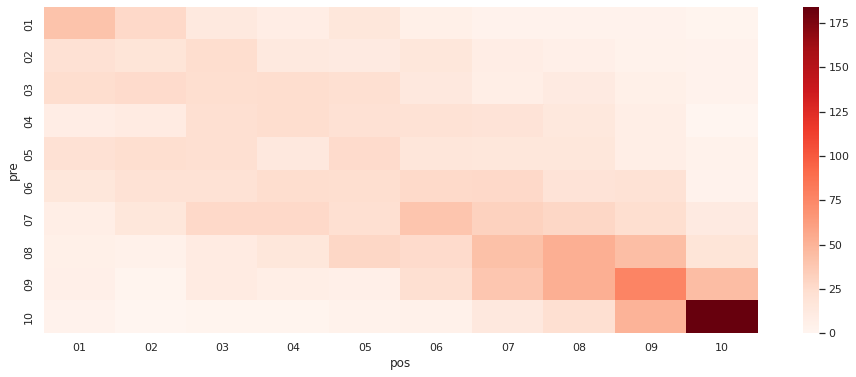

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(merge_cust_prepos_df.groupby(['pre','pos'])['pos'].count().unstack(), cmap="Reds")

視覚的にはこちらの方がわかりやすく、セグメント10付近で人数が多くなっており、ビジネスとしては優良顧客をしっかりとつかんでいるといえるかもしれません。一方、セグメント1に留まっている顧客も少し多いため、この顧客を優良顧客にしていくためのカスタマージャーニー戦略を考えるのも良いでしょう。

以上で練習問題の解答は終わりになります。ここでは、デシルの移動だけを数値で追っただけになりますが、先ほど記載した通り、例えば、あるデシルセグメントにいる人たちをアップさせるための施策を実施した上で、次の半年でどう移動したか、アップした人は増えたのかなど実験と検証をしていくことが重要です。デシル分析や以下のRFM分析は、これらの分析だけで何かできるわけではないので、注意しましょう。

そして、ここでは簡易に期間を分けて分析しましたが、上半期と下半期の両方のある一定期間にIDがいる人などいろいろと分析対象を絞った上で分析していくなど、ある程度前処理をするケースもあります。むしろその方が顧客行動の変遷を見るという意味で一般的であり、分析する際にはどのように設計するかというのが大事になってきます。

### 10.5.3 ABC分析とは

今までは顧客に焦点を当てて、優良顧客をセグメントして識別する方法を学びましたが、焦点を変えて商品に着目して分析するABC分析について紹介します。別名重点分析とも言われます。基本的なアプローチはデシル分析と同じですが、軸としてみるのが消費者ではなく、商品になります。このABC分析は商品についての分析になり、売れ筋商品や死に筋商品なども見極める時に使われたりします。

このABCの分け方として、Aの商品は累積シェア80パーセント以下、Bは95パーセント以下、Cはその他という分け方をしますが、閾値を変更することもあります。イメージとしては、パレートの法則に近く、AやBを優先的に商品として取り扱うかどうかの判断をするために分析が実施されます。

さらにABC分析の補足事項として、商品のカテゴリー内で分析することが多く、例えば、アルコールでもビールカテゴリーに対して分析をしたり、化粧品のある特定のカテゴリー（口紅など）を対象にするなど、商品を絞って分析することが多いです。

なお、カテゴリーの分け方についてはある程度決まっていますが、一律的には決まらず、ある商品をAというカテゴリーに入れるかBというカテゴリーに入れるかは担当者の判断によることもあり、商品カテゴリーマスターというのも定義した後に、分析することも多いです。上で実行したデシル分析やパレートの法則がわかれば、ABC分析は難しくないですが、今回は、商品カテゴリーマスタなどはないため、一旦、全部の商品についてABC分析をかけてみましょう。商品カテゴリーマスタがある場合には、それを後からJOINして分析するだけなので、実装としては本質的にはあまり変わりません。（なお、この商品のカテゴリー分け自体がなかなか難しいのですが、うまくマッピングしてくれるソリューションを提供している企業もあります。）

まずは、商品ごとの売上合計金額を算出します。

In [ ]:
stock_total_p_rank_df = online_retail_data_table.groupby(['StockCode'])['TotalPrice'].sum().sort_values(ascending=False)
stock_total_p_rank_df.head()

StockCode
23843     168469.60
22423     142592.95
85123A    100603.50
85099B     85220.78
23166      81416.73
Name: TotalPrice, dtype: float64

他、今回は簡易のため、データをサンプリングして（100の商品で）ABC分析を実施します。あくまでサンプルでの実装のため、これに大きな意味はありません。先ほどの述べた通り、実際はカテゴリーマスタデータなどを作成してから、実施してください。現に著者がマーケティングの会社で大量のPOSデータを分析していたときは、各営業さんが各カテゴリーの大分類や中分類などを設定したマスターデータを作成した上で、分析を実施していました。今回はそういったマスタデータがないため割愛します。

In [ ]:
sample_df = stock_total_p_rank_df.sample(n=100)
sample_df.sort_values(ascending=False, inplace=True)

次にそれぞれの売上の積み上げとその全体比率を計算してみましょう。

In [ ]:
x = sample_df/sample_df.sum() * 100

In [ ]:
y = sample_df.cumsum() / sample_df.sum() * 100

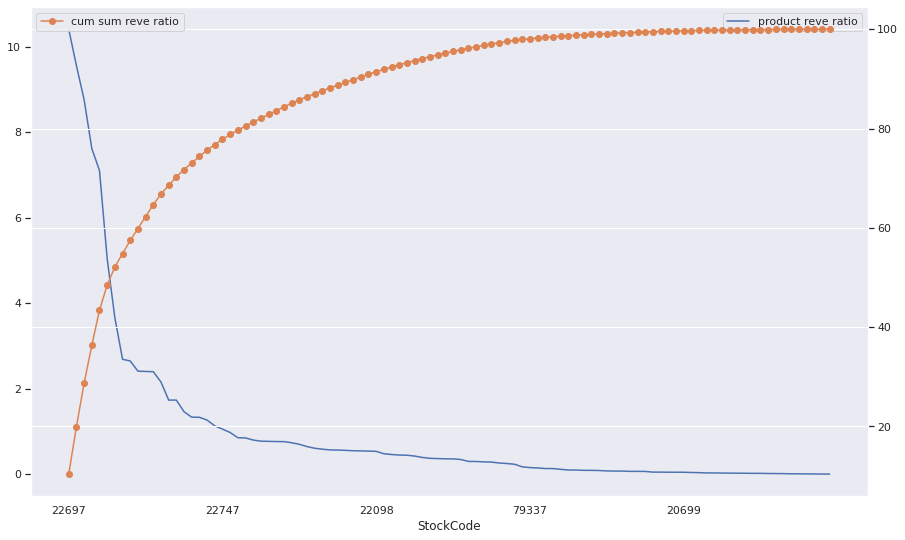

In [ ]:
plt.figure(figsize=(15,9))
x.plot(label='product reve ratio')
plt.legend()
y.plot(marker='o',secondary_y=True,label='cum sum reve ratio')
plt.legend()

上のグラフの横軸は、商品をランキングで並べており、左縦軸がそれぞれの商品の全体に占める割合で青線、右縦軸が売上を積み上げた時のそれぞれの商品における売上割合でオレンジの点線になります。これがABC分析の元になります。オレンジの線に着目すると、商品別ではありますが、上位20パーセントくらいの商品が、だいたい売上の80パーセント占めており、おおよそパレートの法則が成り立っているのがわかります。

上ではどういう実装でABC分析を行うのかというロジックを理解していただくために、上のような実装を紹介しました。もちろん、これだけではAの商品がどこからどこまでの範囲で、Bの商品がどこからどこまでなのか扱いにくいのです。実装上できなくはないですが、以下のABC分析をしてくれるライブラリを使うと簡単にできるため、それをインストールして実装してみることにしましょう。

abc_analysisというライブラリがあるので、それをインストールしてください。

In [ ]:
!pip install abc_analysis

どの中でも、abc_analysisとabc_plotを使うので、importします。

In [ ]:
from abc_analysis import abc_analysis, abc_plot

以下のabc_analysisのインプットとして、商品キーに売上が紐づいているデータを入れて計算します。これで終わりになります。

In [ ]:
abc_analysis_result = abc_analysis(sample_df)

abc_plotを使うことで、以下のようなABC分析の結果を表示してくれます。縦軸が全体の売り上げに占める割合、横軸がそれぞれの商品が占める割合になり、ここでもおおよそ2割の商品が8割の売り上げになっているAグループというのがわかるかと思います。

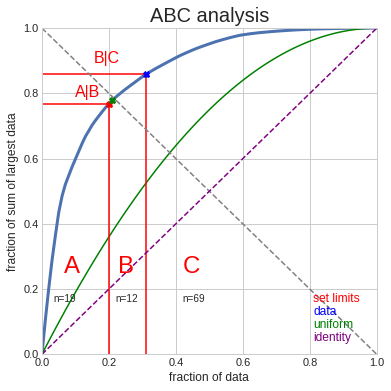

In [ ]:
abc_plot(abc_analysis_result)

もちろん、先程と同じように、この図を見ているだけでは、どこからどこまでがAのグループなのか、Bのグループなのか等わからないです。そこで以下の通り、abc_analysis_resultは辞書型でデータを持っており、上記の閾値などを取得したい時はそのキーを指定して確認できます。

In [ ]:
type(abc_analysis_result)

dict

In [ ]:
abc_analysis_result.keys()

dict_keys(['ABLimit', 'BCLimit', 'ABexchanged', 'Aind', 'Bind', 'Cind', 'smallestAData', 'smallestBData', 'AlimitIndInInterpolation', 'BlimitIndInInterpolation', 'p', 'ABC', 'A', 'B', 'C', 'CleanedData'])

例えば、AとBの金額の閾値と、BとCの金額の閾値はそれぞれ以下のようになり、もしAだけの商品を抜き出したい時は、以下の閾値以上の売上金額の商品を抜き出せばよいです。

In [ ]:
print('AとBの金額閾値は{0:.1f}です。'.format(abc_analysis_result['ABLimit']))
print('BとCの金額閾値は{0:.1f}です。'.format(abc_analysis_result['BCLimit']))

AとBの金額閾値は1930.9です。
BとCの金額閾値は1192.4です。


In [ ]:
print('Aの商品群は以下になります。')
sample_df[sample_df>=abc_analysis_result['ABLimit']]

Aの商品群は以下になります。


StockCode
22697    17806.34
22384    16349.50
22077    14988.59
22622    13035.66
22551    12151.80
22966     8625.13
23553     6257.35
22243     4596.75
23286     4528.29
22898     4120.85
23404     4108.58
23241     4099.52
22431     3686.65
23323     2963.10
22180     2962.65
22582     2496.76
22927     2278.25
22380     2274.75
23438     2161.00
22121     1930.89
Name: TotalPrice, dtype: float64

以上で、ABC分析の紹介は終わります。このABC分析の活用場面でいうと、例えば、何か商品の売り上げをあげるためや仕入れのコストを削減するために、どの商品を強化し、どの商品の仕入を減らすのか判断をする際に、AやBのグループの商品を強化するのか、Cのグループの商品の仕入を減らすのかの検討材料の1つとして使えます。さらに、デシル分析や後ほど紹介するRFM分析を行った上で、その各顧客セグメントの中での商品ABC分析を実施し、各セグメントのニーズに応じた商品サービスの提供を考えることができます。

#### 練習問題
1.   Cだけの商品を抜き出してください。
2.   Bだけの商品を抜き出してください。
3.   2つの国(オーストラリアとドイツ)に注目して、それぞれABC分析を実施して、例えば、ABグループに何か違いがあるかどうか調べてください。

#### 解答

In [ ]:
print('Cの商品群は以下になります。')
sample_df[sample_df<=abc_analysis_result['BCLimit']]

Cの商品群は以下になります。


StockCode
21864     1192.44
22334     1101.44
21363     1034.55
23087      997.18
22152      967.55
21355      961.65
22757      950.46
22372      935.33
22024      928.99
23107      919.80
22098      911.72
84968D     814.92
23004      783.68
84660A     761.90
22325      755.25
21294      722.88
21696      666.70
21786      631.15
22618      621.66
23492      610.50
23435      608.65
85125      584.65
21784      507.45
23219      504.60
22515      488.70
23691      481.50
17096      443.76
77101A     423.22
22638      394.42
16015      289.98
79337      259.96
23474      246.51
90161C     222.75
85161      221.40
20902      190.35
85020      163.80
21427      161.70
35915B     150.15
84963B     149.85
21332      143.30
20903      127.00
44234      121.05
35972      120.00
20655      109.11
21814      108.75
85215      105.95
84507B      79.05
84685       78.75
21372       75.73
90081A      74.25
20699       73.95
90073       64.35
84466       57.50
85160B      46.11
21089       45.73


In [ ]:
print('Bの商品群は以下になります。')
sample_df[(sample_df<abc_analysis_result['ABLimit'])&(sample_df>abc_analysis_result['BCLimit'])]

Bの商品群は以下になります。


StockCode
22747    1800.90
22055    1665.08
22312    1454.99
21713    1448.10
22498    1362.55
21578    1318.50
22399    1309.90
22676    1303.64
22071    1298.79
23469    1255.76
Name: TotalPrice, dtype: float64

商品コード、国を軸にして売上の合計を計算してみましょう。なお、こういうECサイトなどの購買データは以下のような行列で表現することもあり、ほとんどスパース（NaN）であることが多いです。

In [ ]:
s_c_tp_df = online_retail_data_table.groupby(['StockCode','Country'])['TotalPrice'].sum().unstack()
s_c_tp_df.head(20)

Country,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,EIRE,European Community,Finland,France,Germany,Greece,Iceland,Israel,Italy,Japan,Lebanon,Lithuania,Malta,Netherlands,Norway,Poland,Portugal,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
StockCode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.20,NaN,NaN,316.20,0.85,NaN,NaN,NaN,NaN,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.40,NaN,10.20,NaN,NaN,340.85,NaN
10080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.41,NaN
10120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.43,NaN
10125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,390.90,84.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.00,NaN,NaN,437.60,NaN
10133,NaN,NaN,NaN,NaN,NaN,25.4,NaN,NaN,NaN,NaN,16.80,NaN,NaN,NaN,NaN,NaN,NaN,8.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.40,NaN,NaN,NaN,NaN,NaN,8.50,NaN,NaN,1076.11,NaN
10135,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,25.20,NaN,NaN,12.50,212.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1499.49,NaN
11001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.12,NaN,NaN,27.04,54.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.04,NaN,27.04,NaN,NaN,NaN,27.04,NaN,NaN,NaN,NaN,1709.64,NaN
15030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.47,NaN
15034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.36,3.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.80,NaN,NaN,NaN,NaN,NaN,3.36,NaN,NaN,NaN,NaN,670.18,NaN


次に上の対象データ表と国名をインプットとして、ABC分析の結果をアウトプットする関数を作成しましょう。

In [ ]:
def country_abc_analysis(country_name, target_df):
  sample_df = target_df[country_name].dropna()
  abc_analysis_result = abc_analysis(sample_df)
  return abc_analysis_result

オーストラリアとドイツを表示しています。以下はオーストラリアです。

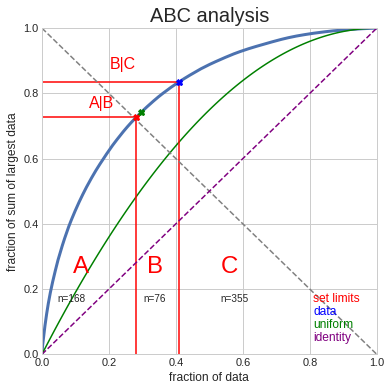

In [ ]:
abc_analysis_result_aud = country_abc_analysis('Australia', s_c_tp_df)
abc_plot(abc_analysis_result_aud)

次はドイツです。

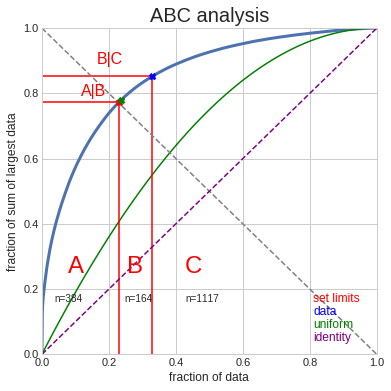

In [ ]:
abc_analysis_result_aud = country_abc_analysis('Germany', s_c_tp_df)
abc_plot(abc_analysis_result_aud)

以上の比較から、ABグループの割合は、オーストラリアは40%の商品が売上8割占めてますが、ドイツでは30%強くらいの商品が占めており、ここから、ドイツの方が集中して商品が売れているのではないかと想像できます。

他にも練習問題とは異なる視点で、何か仮説等があれば、ぜひ実施してみてください。

### 10.5.4 RFM分析とは

さて、再び顧客に焦点をあてましょう。デシル分析では購買金額だけによって顧客を分類してきました。しかし、購入金額が大きければ大きいほどよいお客様、優良顧客だといってよいか別問題になります。

例えば、同じ100万円を使った顧客でも、直近1ヶ月以内で使った人と10年前に使った人では、アプローチの仕方が異なりますし、また一回の買い物だけで100万円使ったのか、10万円を10回使ったのとでは、お客様として購買行動の仕方が異なります。

そのため、ここではRFM分析という手法を使って、購入金額合計だけではない、自社にとって優良顧客をより適切にセグメントするための手法について紹介します。このRFM分析とは、Recency(直近購買日)、Frequency(合計購入回数)、Money(合計購入金額)のそれぞれの頭文字を取り、3軸で顧客を分類するというアプローチになります。よりたくさんお金を使い、直近で買い物があり、購入回数が多いほど、優良顧客と皆して、それを識別するアプローチになります。

RFM分析では上の3つ軸について、それぞれ閾値を定めます。Mでいうと、購買金額が少ない層、そこそこ購入がある層、かなり購入している層など3つにわけます。具体的には、合計金額を0から100までの人をランク１、101から1001までの人をランク２、1001以上の人をランク３としてセグメントを分けたりします。

閾値の決めた方に絶対的なルールはなく、またRFM分析もRFだけFMだけなど業界や企業によって異なることもあります。

ここでは、基準日2011-12-10にこのデータを抽出したと仮定して、分析を進めていくことにします。

RFM分析のFとMについてはすでに分析集計済みのため、Rについて計算をしていきます。具体的には、基準日2011年11月10日から考えて、最後に購入した日からどれくらいの期間が経っているかを計算します。

In [ ]:
base_date = datetime.datetime(2011,12,10)

それぞれの顧客の直近日時を抽出するために、一旦、Indexをリセットします。

In [ ]:
online_retail_data_table.reset_index(inplace=True)

以下でそれぞれの顧客について、直近の購買日時を計算しています。

In [ ]:
cust_rec_rank_df = online_retail_data_table.groupby(['CustomerID'])['InvoiceDate'].max().sort_values(ascending=False)
cust_rec_rank_df

CustomerID
12680   2011-12-09 12:50:00
13113   2011-12-09 12:49:00
15804   2011-12-09 12:31:00
13777   2011-12-09 12:25:00
17581   2011-12-09 12:21:00
                ...        
16583   2010-12-01 12:03:00
17908   2010-12-01 11:45:00
12791   2010-12-01 11:27:00
13747   2010-12-01 10:37:00
18074   2010-12-01 09:53:00
Name: InvoiceDate, Length: 4339, dtype: datetime64[ns]

そして、計算基準日から考えてどれくらいの日数が経っているかを計算します。なお、その日を含めるため1日足しているのと、日単位で計算するためdt.daysで数値に変換しています。

In [ ]:
cust_rec_rank_df = (base_date - cust_rec_rank_df + datetime.timedelta(days=1)).dt.days
cust_rec_rank_df

CustomerID
12680      1
13113      1
15804      1
13777      1
17581      1
        ... 
16583    374
17908    374
12791    374
13747    374
18074    374
Name: InvoiceDate, Length: 4339, dtype: int64

上記から前日までの購入している顧客もいれば、1年以上購入していない顧客がいることがわかります。

次に、RFM分析をするために、まずは顧客IDごとにデータを統合します。CustomerIDがキーとなって、上記の練習問題で解いた結果も使います。

In [ ]:
merge_cust_rmf_df = pd.concat([cust_rec_rank_df, cust_invoice_rank_df, cust_total_p_rank_df]
                              , axis=1
                              , join='inner')
merge_cust_rmf_df.columns = ['R','F','M']
merge_cust_rmf_df

,R,F,M
CustomerID,,,
12680,1,4,862.81
13113,1,24,12245.96
15804,1,13,4206.39
13777,1,33,25977.16
17581,1,25,11045.04
...,...,...,...
16583,374,1,233.45
17908,374,1,243.28
12791,374,1,192.60


一旦、Seabornのpairplotを使って、それぞれの散布図とヒストグラムをチェックしてみましょう。（このデータ可視化も松尾研究室提供のDS講座でコンテンツが提供されていますので、わからない方は復習してください。）

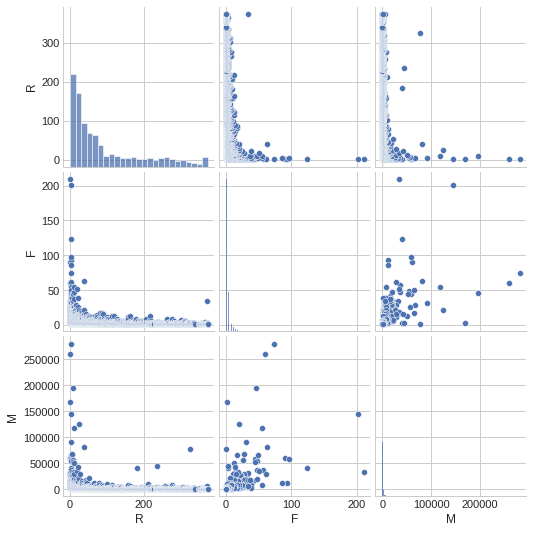

In [ ]:
sns.pairplot(merge_cust_rmf_df)

上記のグラフを見るとRについてはロングテールになっており、またFやMについてもそうなっていますがRと比較するとだいぶテールが広がっており、極端に買う人と買わない人で分かれているのがわかります。この現象はどのECサイトや購買系のデータをみると同じような結果になっていることが多いようです。

ただ、上のグラフからは、RとFの関係がわかりにくいため、jointplotを使って詳細にみてみましょう。これを使うと、2軸でどの辺にボリュームゾーンがあるのかというのがわかります。

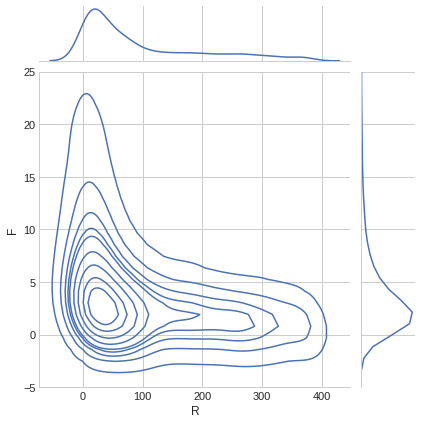

In [ ]:
ax = sns.jointplot(x="R", y="F", kind="kde", data=merge_cust_rmf_df)
plt.ylim(-5,25)
plt.show()

RとMの関係も上と同じような形になります。（なお、補足ですが、RやFがマイナスになっている部分も大きいですが、これはカーネル密度関数で「推定」した結果のため注意しましょう。）

ここでそれぞれの閾値で分割することを決めますが、Fについては綺麗に均等することがなかなか難しいため、以下のようにキメで分割することにします。

In [ ]:
q_f_merge_cust_rmf_df = pd.cut(merge_cust_rmf_df.F, [0, 1, 3, 10, 100,250])

In [ ]:
q_f_merge_cust_rmf_df.value_counts().sort_index()

(0, 1]        1494
(1, 3]        1343
(3, 10]       1165
(10, 100]      334
(100, 250]       3
Name: F, dtype: int64

購買金額や回数についてはもここではキメで、5つに均等に分けましょう。

In [ ]:
q_r_merge_cust_rmf_df = pd.qcut(merge_cust_rmf_df.R, 5)
q_m_merge_cust_rmf_df = pd.qcut(merge_cust_rmf_df.M, 5)

それぞれどのように区切られたかチェックします。

In [ ]:
q_r_merge_cust_rmf_df.value_counts().sort_index()

(0.999, 14.2]     868
(14.2, 33.0]      881
(33.0, 72.0]      863
(72.0, 180.0]     866
(180.0, 374.0]    861
Name: R, dtype: int64

In [ ]:
q_m_merge_cust_rmf_df.value_counts().sort_index()

(-0.001, 250.106]        868
(250.106, 489.724]       868
(489.724, 941.942]       867
(941.942, 2057.914]      868
(2057.914, 280206.02]    868
Name: M, dtype: int64

そして、RFM分析のため、全てマージしています。

In [ ]:
q_merge_cust_rmf_df = pd.concat([q_r_merge_cust_rmf_df, q_f_merge_cust_rmf_df, q_m_merge_cust_rmf_df]
                              , axis=1
                              , join='inner')
q_merge_cust_rmf_df.columns = ['gR','gF','gM']
q_merge_cust_rmf_df

,gR,gF,gM
CustomerID,,,
12680,"(0.999, 14.2]","(3, 10]","(489.724, 941.942]"
13113,"(0.999, 14.2]","(10, 100]","(2057.914, 280206.02]"
15804,"(0.999, 14.2]","(10, 100]","(2057.914, 280206.02]"
13777,"(0.999, 14.2]","(10, 100]","(2057.914, 280206.02]"
17581,"(0.999, 14.2]","(10, 100]","(2057.914, 280206.02]"
...,...,...,...
16583,"(180.0, 374.0]","(0, 1]","(-0.001, 250.106]"
17908,"(180.0, 374.0]","(0, 1]","(-0.001, 250.106]"
12791,"(180.0, 374.0]","(0, 1]","(-0.001, 250.106]"


実際の数値もつけておきましょう。

In [ ]:
all_merge_cust_rmf_df = pd.concat([merge_cust_rmf_df,q_merge_cust_rmf_df]
                              , axis=1
                              , join='inner')
all_merge_cust_rmf_df

,R,F,M,gR,gF,gM
CustomerID,,,,,,
12680,1,4,862.81,"(0.999, 14.2]","(3, 10]","(489.724, 941.942]"
13113,1,24,12245.96,"(0.999, 14.2]","(10, 100]","(2057.914, 280206.02]"
15804,1,13,4206.39,"(0.999, 14.2]","(10, 100]","(2057.914, 280206.02]"
13777,1,33,25977.16,"(0.999, 14.2]","(10, 100]","(2057.914, 280206.02]"
17581,1,25,11045.04,"(0.999, 14.2]","(10, 100]","(2057.914, 280206.02]"
...,...,...,...,...,...,...
16583,374,1,233.45,"(180.0, 374.0]","(0, 1]","(-0.001, 250.106]"
17908,374,1,243.28,"(180.0, 374.0]","(0, 1]","(-0.001, 250.106]"
12791,374,1,192.60,"(180.0, 374.0]","(0, 1]","(-0.001, 250.106]"


ここでRFM分析を立体的なグラフにすることが多いのですが、若干見にくくなるので、2つの軸を決めて集計をしてみます。FとMはそれぞれバスケット数と購買金額でそれぞれ相関が高いと考えられるため、いったんMを選び、残りのRを選択することにします。以下は、RとMのそれぞれのセグメントにどれだけ人数がいるか集計した表です。

In [ ]:
all_merge_cust_rmf_df.groupby(["gM","gR"])["M"].count().unstack()

gR,"(0.999, 14.2]","(14.2, 33.0]","(33.0, 72.0]","(72.0, 180.0]","(180.0, 374.0]"
gM,,,,,
"(-0.001, 250.106]",59,108,160,182,359
"(250.106, 489.724]",77,137,173,197,284
"(489.724, 941.942]",125,177,200,232,133
"(941.942, 2057.914]",211,230,189,174,64
"(2057.914, 280206.02]",396,229,141,81,21


こちらは左下にけば行くほど、優良顧客になります。なお、上の結果を見ると、あまり金額として購買が大きくなく、しばらく買っていないお客さんも多そうです。

次は、それぞれのセグメントの売上金額の合計を算出しています。

In [ ]:
all_merge_cust_rmf_df.groupby(["gM","gR"])["M"].sum().unstack()

gR,"(0.999, 14.2]","(14.2, 33.0]","(33.0, 72.0]","(72.0, 180.0]","(180.0, 374.0]"
gM,,,,,
"(-0.001, 250.106]",10156.96,16419.180,25963.91,27299.450,53250.140
"(250.106, 489.724]",28176.81,49630.030,63659.04,70889.421,99620.520
"(489.724, 941.942]",88965.61,123845.151,137183.89,158086.111,88613.130
"(941.942, 2057.914]",305244.63,324123.210,265522.90,239798.480,85521.870
"(2057.914, 280206.02]",4231690.91,1257109.360,641092.08,290138.090,229407.021


そして、以下は１法人あたりの購買金額をヒートマップにしたものになります。以下の図より、Mのランクが高いほど大きな金額を占めているのは当たり前なのですが、直近で買い物したロイヤリティの高い顧客もいれば、180日以上買い物していないにも関わらず、過去にかなり購買している顧客もいるということがわかります。

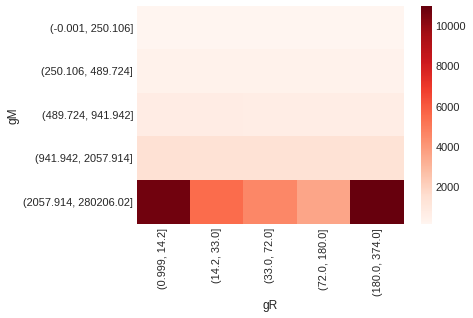

In [ ]:
sns.heatmap(all_merge_cust_rmf_df.groupby(["gM","gR"])["M"].sum().unstack() / all_merge_cust_rmf_df.groupby(["gM","gR"])["M"].count().unstack(), cmap="Reds")

このことから、例えば、過去にお客さんはたくさん買っていたのになぜ直近は買わなくなったのか、仮説を考えていくことが大事です。ただ、そんなにギフトを買わないけど、半年〜1年で定期的に買うお客様かもしれないですし、単に何かのキャンペーンで1度だけきたお客様かもしれませんし、それはその背後にある情報やデータがないとこれだけではわかりません。しかし、直近買っていないお客様に何かしらのアプローチをすることも検討し、何が良いかはこれもまた施策の実験をして、改善されているかどうかを検証していくしかないのです。

以上で、RFM分析を終わります。デシル分析でも述べましたが、これで終わりにするのではなく、各セグメントに対してどのようにアプローチを変更させて、それが効果があったのかなかったのか実験して、検証していくのがポイントになります。

#### 練習問題
1.   閾値を色々と変更してRFM分析を実施してください。
2.   いくつかの国をピックアップして、それぞれの国におけるRFM分析を実施してください。

（上記の実装の閾値を変更させたり、国を選んで元のデータをフィルタリングするなどすれば実装できますので、解答は省略します。）

### 10.5.5 離反分析とは

今までは、既存の顧客に対する分析でした。つまり、目的として、既存のお客さんに対していかにサービスを向上させるために、それぞれのセグメントに分けて顧客を識別するという視点でした。

ここでは離反分析について紹介していきます。離反分析とは、その名の通り、顧客は離反してしまう（購買しなくなる）こともあるため、その原因を分析したり、対策をするために行われます。一定程度の離反は仕方ないですが、顧客がどんどん離れてしまうことは、企業の売り上げに大きな打撃となるため、いち早くその変化を捉えて、なぜ顧客が離反しているのか、どうやったら食い止めることができるかなど、先手を打つことが重要になってきます。

顧客を識別するという点では先ほどと同じですが、離反を防ぐための目的で、顧客を抽出していきます。離反分析の具体的な実装ですが、実はすでに前のデシル分析をやったときと同じようなアプローチで離反を定義し分析することができます。なお同じことですが、KPIとしては「継続率（1-離反率）」を設定してモニタリングされることが多く、離反の分析は継続の分析をしているともいえます。

ここで、顧客の離反分析について注意点があります。携帯電話や保険の契約などの継続的なサービスであれば、データ上も「離反した」というのが定義しやすいのです。一方、消費財（あるビールや日用雑貨類など）などは特に継続しているかしていないかの判断が難しいケースもあります。このような場合、一定程度の購買期間を定めて 、その間に何も購買がなかったら離反しているとみなすなど、定義する必要もあります。ここではそのケースにあたるため、期間を区切って離反を定義します。

では、具体的に「離反」はどうやってデータ上定義するのでしょうか？以下の実装を見ていく前に、少し考えてみてください。

以下ではデシル分析で使ったデータを再利用します。

In [ ]:
merge_cust_prepos_df = pd.concat([pre_q_ten_cust_price_df, pos_q_ten_cust_price_df]
                              , axis=1
                              , join='outer')
merge_cust_prepos_df.columns = ['pre', 'pos']
merge_cust_prepos_df

,pre,pos
CustomerID,,
12346,10,NaN
12347,09,09
12348,08,03
12349,NaN,09
12350,04,NaN
...,...,...
18280,02,NaN
18281,01,NaN
18282,NaN,02


pre（上半期）とpos（下半期）で分けたのでした。上のデータから、もともとPre（上半期）には以下の人数がいることがわかります。

In [ ]:
pre_count = merge_cust_prepos_df.pre.notnull().sum()
pre_count

3144

ここでは離反とは、上半期にいた顧客が下半期にいなくなるということです。データ上は、pre(上半期)のデータでNANではなくて、pos(下半期)のデータでNANになった人はどれくらいいるのかを考えるのが「離反」になります。以下でその人数を計算しています。

条件としては上で述べた通りのフィルターで人数を絞って、計算しています。

In [ ]:
pos_churn_count = merge_cust_prepos_df[merge_cust_prepos_df.pre.notnull()].pos.isnull().sum()
pos_churn_count

1144

つまり離反率は以下のように計算でき、約36％という数字になりました。

In [ ]:
pos_churn_count / pre_count * 100

36.387

一概にこの数値が高い離反率とは言えないですが、定期的にこの離反率（もしくは継続率）の時系列推移を見ることで、傾向として離反率が上がっているのか、抑えられているのかがわかります。離反率が上昇していて問題になるような時は、継続的にこの数値をKPIとしてモニタリングすることにして、例えば、36%の離反率を今年は25％以内に抑えることを目標として、そのための施策や対策を練っていくことが重要になります。なお、そのKPIレポーティングツールなどについてはPythonを使ってできますので、そういった業務の自動化については、次の中級編で少し紹介していきます。

なお、このデータはECサイトで販売している商品は「ギフト」のため、普通の消費財（飲料、お菓子、日用品）などの購買行動とは性質が異なることは想像でき、そういった意味で消費財より離反率が高くても問題はないという判断もできます。このケースも比較する対象を考えて、設計して、分析していきましょう。

#### 練習問題

以下、上の離反の定義は変更せず、 国ごとに顧客(CustomerID)の離反率に違いがあるかどうかを調べてください。

#### 解答

以下でどの顧客がどの国からか調べています。一部、2つの国で買い物をしている人がいますが、人数は少ないため、今回の分析対象からは除外します。

In [ ]:
cutum_country_cnt_df = online_retail_data_table.groupby(["CustomerID"])["Country"].nunique().sort_values(ascending=False)
cutum_country_cnt_df.head(10)

CustomerID
12394    2
12429    2
12457    2
12417    2
12422    2
12370    2
12455    2
12431    2
14326    1
14323    1
Name: Country, dtype: int64

In [ ]:
exclude_id = cutum_country_cnt_df[:8].copy()
exclude_id.index

Int64Index([12394, 12429, 12457, 12417, 12422, 12370, 12455, 12431], dtype='int64', name='CustomerID')

以下は除外対象したあとのCustmerIDとCountryの紐付けデータを作成しています。

In [ ]:
cutum_country_df = online_retail_data_table[~online_retail_data_table["CustomerID"].isin(exclude_id.index)].groupby(["CustomerID","Country"])["Country"].nunique()
cutum_country_df.head(10)

CustomerID  Country       
12346       United Kingdom    1
12347       Iceland           1
12348       Finland           1
12349       Italy             1
12350       Norway            1
12352       Norway            1
12353       Bahrain           1
12354       Spain             1
12355       Bahrain           1
12356       Portugal          1
Name: Country, dtype: int64

データ前処理をします。

In [ ]:
merge_df2 = merge_cust_prepos_df.merge(cutum_country_df, left_index=True, right_index=True)
merge_df2.columns=["pre","pos","cnt"]
merge_df3 = merge_df2.reset_index()

イギリスを見てみます。

In [ ]:
target_df = merge_df3[merge_df3.Country=="United Kingdom"]

In [ ]:
pre_count = target_df.pre.notnull().sum()
pos_churn_count = target_df[target_df.pre.notnull()].pos.isnull().sum()
print("churn ratio:{:.6f} %".format(pos_churn_count/pre_count * 100))

churn ratio:36.427567 %


当たり前ですが、イギリスが購買者が多いため、上と同じような結果になりました。後は、単純にループしてそれぞれの国ごとの離反率をみてみましょう。ただ、人数が少ないため、絶対数の変化もそれぞれ載せておきましょう。

In [ ]:
for country in merge_df3.Country.unique():
  target_df = merge_df3[merge_df3.Country==country]
  pre_count = target_df.pre.notnull().sum()
  pos_churn_count = target_df[target_df.pre.notnull()].pos.isnull().sum()
  print(country+" | churn ratio:{0:.2f} %　| {1}=>{2}".format(pos_churn_count/pre_count * 100,pre_count,pos_churn_count))

United Kingdom | churn ratio:36.43 %　| 2844=>1036
Iceland | churn ratio:0.00 %　| 1=>0
Finland | churn ratio:33.33 %　| 6=>2
Italy | churn ratio:50.00 %　| 8=>4
Norway | churn ratio:16.67 %　| 6=>1
Bahrain | churn ratio:100.00 %　| 2=>2
Spain | churn ratio:35.00 %　| 20=>7
Portugal | churn ratio:50.00 %　| 12=>6
Switzerland | churn ratio:41.67 %　| 12=>5
Austria | churn ratio:71.43 %　| 7=>5
Cyprus | churn ratio:66.67 %　| 3=>2
Belgium | churn ratio:30.00 %　| 20=>6
Unspecified | churn ratio:50.00 %　| 4=>2
Denmark | churn ratio:0.00 %　| 4=>0
Australia | churn ratio:28.57 %　| 7=>2
France | churn ratio:29.69 %　| 64=>19
Germany | churn ratio:27.27 %　| 66=>18
RSA | churn ratio:nan %　| 0=>0
Greece | churn ratio:100.00 %　| 3=>3
Sweden | churn ratio:20.00 %　| 5=>1
Israel | churn ratio:100.00 %　| 1=>1
USA | churn ratio:100.00 %　| 1=>1
Saudi Arabia | churn ratio:100.00 %　| 1=>1
Poland | churn ratio:25.00 %　| 4=>1
United Arab Emirates | churn ratio:100.00 %　| 1=>1
Singapore | churn ratio:0.00 %　| 1=>0
Japa

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """


上の結果を見るに、フランスやドイツはイギリスよりも離反率が小さいですが、母数が少なすぎますし、他の国も同様なため、参考程度にみてください。ここではあくまで練習問題のために実施したため、実務的にはあまり他の国はあまりみないというのが選択肢の1つではあると思います。

### 10.5.6 LTV分析とは

今までは、ある一定期間において顧客をセグメントしたり、ある断面だけに着目し分析をしてきました。しかし、顧客というのは、できれば末長く顧客でいて欲しいのが企業の願いであり、これを分析するためのアプローチがLTVになります。LTVは、ライフタイムバリュー（LifeTimeValue）の略で、この３単語の頭文字からとっています。このLTVは聞いたことがある人もいるかもしれません。直訳すると、顧客生涯価値になり、企業にとってその顧客が一生涯でどれだけお金を落としてくれるかというのを把握します。そして、それをベースに、新しい顧客を獲得するのにどれくらいのコストをかけて良いか、また、顧客を獲得した後もLTVを高めていくために、どれくらいのコストをかけて顧客を維持するかを判断されます。これがLTV分析をする目的になります。

ただし、ここでは、その顧客に対するコスト（施策、サービスなど）のデータは取れていないため、算出することはできませんが、そういったデータを貯めることで、より適切に顧客へアプローチでき、施策のコスト、ROIを検討していくことができるでしょう。

### 10.5.7 課題探索のための売上要因分解

ここでは、課題発見のための売上要因分解について解説をしていきます。これは一概に決まっているわけではありませんが、ある程度、フレームとして決まっているので、その集計をしていきましょう。具体的には、以下のように売上を分解することができます。

1年の売上＝１法人あたりの年間売上✖︎法人数＝１種類あたりの年間売上✖︎１法人あたりの年間購入種類数✖︎法人数

もちろん、これ以外にも様々な分解が可能です。今回のPOSデータで年間比較は難しいですが、使い方としては年ごとに計算して比較します。目的課題としては、「売上の減少の要因で一番注目すべきはどこなのか？」を考えるのに、昨年の要因分解結果と、今年の要因分解結果を比較するというアプローチもとれると思います。

この要因分解が全くできないという方は、まずそういう思考やフレームワークを身に付けるために、前で紹介した『グロービスMBAマーケティング』や『グロービスMBAクリティカル・シンキング』、『定量分析の教科書ビジネス数字力養成講座』などありますので参考にしてください。

なお、Pythonでの実現方法としては、今までやったことがわかっていれば、おそらく実装は可能であると思います。ここは最後に総合問題として、取り組んでいただくことにしましょう。

### 10.5.8 POSデータ以外のデータ活用とその他の手法

以上が消費者分析とPOSデータに関する基本的なアプローチになります。ここでは補足として、今後の考えるべき方向性やデータ分析の限界についても述べていきます。

例えば、この講義のようにPOSデータしか扱えない場合（他に情報がない場合）、なぜ売上が上がっているのか、このデータだけでは判断が難しいです。「仮説」として、クリスマスシーズンで何かの企画をしたからなのか、バズったからなのか、大きな取引契約が決まっていたからかなど、他のソースから判断しないとわからないケースもあります。

ですので、何度も述べている、「仮説と実験や試験（アクション）、検証」が重要になってきます。仮説としては、売り上げが減っているのはなぜか？それは業界としての課題なのか？　特定のカテゴリーだけ何か？など、なぜを5回くらい繰り返すことが重要だと言われています。そして、実験が重要だということを述べ、その時に考えなければいけないのが「因果関係」です。どういったアクションをとれば、顧客行動は変化し、どう売上につながるのかなど、しっかりと検証していくことも重要です。それがわからないと、施策で何が効いたのか効かなかったのかわからず、改善などしていけないからです。ただ、因果関係については難しいトピックになり少し中級〜上級の話になるため、次の中級編にて一部紹介していきます。

一方で、冒頭で述べたように、昨今は大量にデータを貯めることができる環境が整ってきていますので、データ戦略をしっかりと立て、必要なデータを蓄積していくという方針もとても重要です。今回のPOSデータの分析でいうと、他に必要となってくるデータとして、商品ごとの詳細情報（カテゴリー分類）、仕入れ情報、棚割り情報（リアル店舗の場合）、レコメンドした時のデータとその結果、在庫情報、顧客の情報、施策（割引企画、イベントなどカレンダー）の情報、ウェブ上でのアクセス情報や天候データなどがあります。これらのデータを統合させると、より細かく分析や実験、検証ができるでしょう。他、ポイントを付与しているカードであれば、そのデータを繋げることもできますし、さらに、昨今はコールセンターのログや音声情報、SNSなどのテキストデータなどの活用もされてきています。そして、重要なのが、そのデータを使ってユーザーにアクションすること（アクションできるシステムにしていること）です。

もちろん、目的もなく闇雲にデータを蓄積したり、システムを構築しても意味がありませんので、冒頭に述べたマーケティング戦略、目的に沿ったデータを集める仕組みを考え、データ活用していくことが、データドリブンな組織に繋がり、顧客へのより良いサービス提供に繋がっていくことになります。

他、POSデータを分析するときの基本手法として、マーケットバスケット分析などもありますが、今回は割愛します。先ほどの因果関係やリコメンデーション、価格設定などの少し高度なアプローチについては、次の中級編にて扱います。

#### 補足事項1：Python以外のツールを使って（エクセル、SAS、SPSSなど）分析する

Pythonは、他の言語と比べて比較的簡単にいろいろな実装できますが、用途によっては他のツールでやったほうがいいケースもあります。冒頭で述べた通り、軽く分析するときはエクセルの方がいいですし、素早く手を動かしながらなんでもできるのがエクセルになります。

ただし、それが手作成巨大システムもどき？になる恐れがあるので、注意が必要です。不必要なプロセスを関数で作ったり、VBAで処理させたり、複雑怪奇なシステムが出来上がりがちです。システム設計のような設計書もなく、ただ人づてで引き継がれているエクセルシステムが存在し、最終的に誰も仕様やその背景がわからないというケースを著者はたくさん見てきました（これはシステム全般に言えることもかもしれませんが）。

そのような場合には、予算を割いて本格的なシステムを構築をした方が、人の手でやることも、余計なオペレーションをすることもなく、人件コストを最終的に下げることにつながります。ビジネス要件によりますが、ハイスピードで処理をすることが求められなければ、Pythonで十分システム開発できるので、Pythonからはじめるのも手です。

他、各データを分析するためのツールは世の中にいろいろと出ています。有名どころだとSASやSPSSもGUIとして扱いやすいですが、値段が高いため、まずは無料のPythonでさくっとやるとのもいいと思います。Rも良いと思いますし、データベースにデータがあればSQLを使ってやる方がよいでしょう。

アクセスログデータであれば、Googleアナリティクスが有名ですし、その他Abobeの製品もあります。さらに、マーケティングオートメーション(MA)ツールなどもあり、これはユーザーアクションや属性等に応じてアプローチを変化させることができ、ユーザーの行動ドリブンなツールといえるでしょう。

マーケティングのツールとしては、google trendで検索ワードの検索ボリューム変化を見たり、SimilarWebなどで競合のサイトのユーザー訪問ボリュームなどもわかったりします。これら以外にも様々なツールや様々なデータ（公開されているデータ、購入の必要があるデータなど）もありますが、これらのツールやデータもやみくもに集めるのではなく、戦略や目的に応じて使い分けるのが良いでしょう。

#### 補足事項2：Pythonを使ったBIやレポーティングの作成

昨今、データを可視化するデータビジュアライゼーションが注目され、そのようなソリューション（TablueやPowerBIなど）が使われれるようになっています。もちろん、時間的なコストや用途を考えるとツールを使った方が色々と効率が良いのですが、簡単なレポーティングであれば、Pythonを使っても可能です。

具体的には、上のような離反率やABC分析などレポートを作成するために、定期的にPDFなどレポートにまとめ、メールで送信するということも可能で、さらにteams、slack、lineなどにもメッセージ送信することや、エクセルの処理やgoogle spreadの操作もPythonでできたりします。さらに、BI的にデータを可視化した結果を開放することで、社内でより多くの人にみてもらえて、データ駆動型への組織になっていくことでしょう。

Pythonを使ったレポート機能や自動化についても、次の中級編で少し扱います。

***

## 10.6 総合問題

1.   4節でデータの前処理に問題がありそうだというのがわかりました。それを考慮して、どのように処理するのか、データ分析するのか判断して、設計して実施してみてください。（一律的な答えがあるわけではありません。）
2.   続いて1で判断したデータに対して、2010年12月における簡単な売上要因分解をしてみます。購買顧客（法人）数、1法人あたりの購買合計金額平均、1法人あたりの購買回数（バスケット平均数）を算出し、表示してください。
3.   続いて1で判断したデータに対して、2011年1月から2011年11月までの毎月における、購買顧客（法人）数、1法人あたりの購買合計金額平均、1法人あたりの購買回数（バスケット平均数）を算出し、表示してください。ここから何かわかることはありますか？
4.   上記以外の売上要因分解を実施して、何か仮説を考えて検証してみましょう。
5.   今までの分析手法を組み合わせて（デシル分析、ABC分析など）、分析設計してみましょう。また、それらを実施して、各セグメントに対してどういったアプローチが考えられるか検討してみましょう。さらに、具体的にどんなデータがあればどんな分析ができるのか、施策を考えてどうやって実験をするのか、どうそれを検証するかも考えてみましょう。データは仮想で作っても構いません（例：顧客のECサイトへのアクセスデータ、商品マスタデータ、顧客をランダムに選び、ある一定期間、何かコストのかかるDMを送ったデータ、など）

##### 解答

データをJOINするなどしてキャンセルされたレコードを取り除くこともできますが、なかなか骨が折れそうです。そこで今回は、キャンセルのQuantityがマイナスになっていることに着目して、売り上げ金額についてはそれを含めて集計することで最終的に相殺された結果で算出されるため、実はそのまま使うことにします。

In [ ]:
tmp_online_retail_data_table['TotalPrice'] = tmp_online_retail_data_table.Quantity * tmp_online_retail_data_table.UnitPrice

また時系列処理をするためにInvoiceDateをインデックスに指定します。

In [ ]:
tmp_online_retail_data_table.set_index("InvoiceDate", inplace=True)

In [ ]:
tmp_online_retail_data_table.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 406829 entries, 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   UnitPrice    406829 non-null  float64
 5   CustomerID   406829 non-null  int64  
 6   Country      406829 non-null  object 
 7   cancel_flg   406829 non-null  object 
 8   TotalPrice   406829 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 31.0+ MB


以下を見ると、2011年12月にあった売上異常値は、そのキャンセルレコードによって相殺され、なくなっていることがわかります。

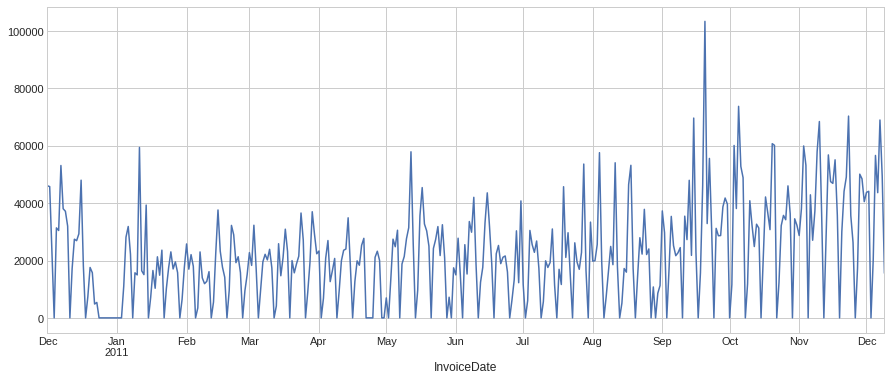

In [ ]:
tmp_online_retail_data_table['TotalPrice'].resample('D').sum().plot(figsize=(15,6))

さて、それぞれ足し込んで結果相殺されるとはいえ、厳密には前に説明した通り、2010年12月以前の購買がキャンセルされて、今の保有のデータにキャンセルデータだけ入っている場合もあります。そして、このデータを適切に取り除くことはなかなか困難ですし、さらに後半2011年12月までに注文したものが例えば2012年以降にキャンセルされるかもしれませんが、それを計算基準日時点で把握するのは困難です。

さらに、サンプルとして、CustomerIDが15749の法人の購買データを見てみます。

In [ ]:
tmp_online_retail_data_table[(tmp_online_retail_data_table.CustomerID==15749)]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,cancel_flg,TotalPrice
InvoiceDate,,,,,,,,,
2011-01-11 12:55:00,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2.55,15749,United Kingdom,5,4921.5
2011-01-11 12:55:00,540815,21175,GIN + TONIC DIET METAL SIGN,2000,1.85,15749,United Kingdom,5,3700.0
2011-01-11 12:55:00,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2.10,15749,United Kingdom,5,6539.4
2011-01-11 12:57:00,540818,47556B,TEA TIME TEA TOWELS,1300,2.55,15749,United Kingdom,5,3315.0
2011-01-11 12:57:00,540818,48185,DOORMAT FAIRY CAKE,670,6.75,15749,United Kingdom,5,4522.5
2011-04-18 13:08:00,C550456,48185,DOORMAT FAIRY CAKE,-670,6.75,15749,United Kingdom,C,-4522.5
2011-04-18 13:08:00,C550456,47566B,TEA TIME PARTY BUNTING,-1300,2.55,15749,United Kingdom,C,-3315.0
2011-04-18 13:08:00,C550456,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1930,2.55,15749,United Kingdom,C,-4921.5
2011-04-18 13:08:00,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,1.85,15749,United Kingdom,C,-3700.0


上のデータを見ると2011年11月に買ったものを2011年4月18日にキャンセルし同日に同じものを購入しているように見えます。それぞれの購入金額をよくみてみると、おそらく価格が下がってそれで買い直しをしているように見えます。これが良いかどうかは別にしまして、この対象商品「47566B」は「TEA TIME PARTY BUNTING」がキャンセルされているようですが、本来は「47556B」の「TEA TIME TEA TOWELS	」をキャンセルすべきではなかったでしょか。法人対象の購買なので、おそらく可能性として、担当者が間違って入力した恐れもあります。データ分析をやる身としてはこういったことは日常茶飯事ですが、それを全て探して判定して修正するのは時間がかかるため、この講義ではやりません。プロジェクトによっては時間をかけてやることもありますが、今回はそのようなケースは少数（以下より2%ほど）で、分析には影響がほとんどないとみなし、そのまま進めることにします。

In [ ]:
tmp_online_retail_data_table.cancel_flg.value_counts()/tmp_online_retail_data_table.cancel_flg.count() * 100

5    97.81112
C     2.18888
Name: cancel_flg, dtype: float64

なお、先ほども述べましたが、本来であれば、注文したInvoiceNoと紐付けた形でキャンセルのInvoiceNoがあるべきなのですが、このような関係にデータがなっていないので、データ前処理する人が苦しむことになります。上のデータで、「もしかして手入力のステップがあって、打ち間違えったのではないか」という推測がありましたが、そのミスした人が悪いという話ではなく、そのミスをなくす仕組み・システムにする（例えば、手入力ではなく、過去に注文されたものしかプルダウン等で選択できないようなシステムにする）ことが重要です。今後は、データ分析できるようにログをしっかり取る仕組みを設計し開発することで、このような厄介なケースに遭遇することはなくなります。ここは下手に頑張らないで、もっと中長期的な目線で考え、データ戦略の一部として、データマネジメントを検討していくことが賢明なのではないかと思います。

さて、ここからは売上の要因分解をしていきましょう。月毎の顧客ユニーク数、売上額の平均、バスケット数の平均を求めていきます。

まず、2010年12月ということなので、以下求めています。

In [ ]:
target_df = tmp_online_retail_data_table[tmp_online_retail_data_table.index< datetime.datetime(2011,1,1)]

In [ ]:
print("Cnt ID:{0}".format(target_df["CustomerID"].nunique()))
print("Avg Revenue:{0:.2f}".format(target_df["TotalPrice"].sum()/target_df["CustomerID"].nunique()))
print("Avg Busket:{0:.2f}".format(target_df["InvoiceNo"].nunique()/target_df["CustomerID"].nunique()))

Cnt ID:948
Avg Revenue:585.03
Avg Busket:1.80


ここから2011年1月から11月まで求めていきますが、一気に求めます。

In [ ]:
st_dt = datetime.datetime(2011,1,1)
end_dt = datetime.datetime(2011,11,30)

In [ ]:
target_df = tmp_online_retail_data_table[(tmp_online_retail_data_table.index>=st_dt)&(tmp_online_retail_data_table.index<=end_dt)]

月毎のユニーク顧客数です。

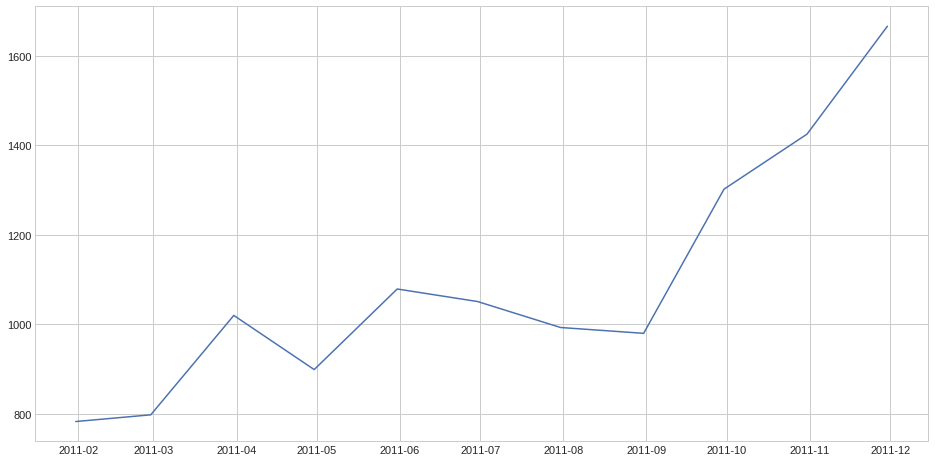

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(target_df["CustomerID"].resample('M').nunique())

次は、月毎の顧客一人あたりの売上金額推移です。2011年5月が落ち込んでいるようですが、基本的にのびています。

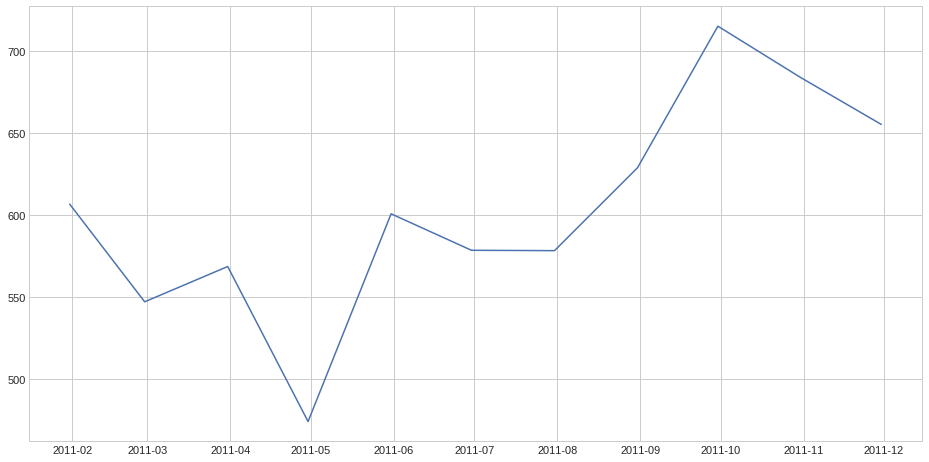

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(target_df["TotalPrice"].resample('M').sum() / target_df["CustomerID"].resample('M').nunique())

次は、月毎の顧客一人あたりのバスケット数の推移です。これを見ると、少しずつ多くなっているようにも見えますが、ほとんど1~2しか買っていないのがわかります。

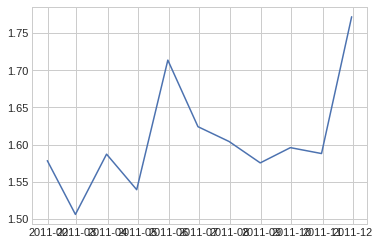

In [ ]:
plt.plot(target_df["InvoiceNo"].resample('M').nunique()/target_df["CustomerID"].resample('M').nunique())

以上の結果より、法人数も徐々に伸びており、１顧客あたりの購買金額とバスケット数も伸びているということがこの時系列データよりわかります。

なお、練習の4と5については決まった答えがあるわけではないですが、答えよりも考えることの方が重要なため、ぜひ取り組んでみてください。

**謝辞**：以下のデータセットの利用に関して  
http://archive.ics.uci.edu/static/public/352/online+retail.zip

引用元：Markelle Kelly, Rachel Longjohn, Kolby Nottingham,
The UCI Machine Learning Repository, https://archive.ics.uci.edu
 
Daqing Chen, Sai Liang Sain, and Kun Guo, Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database Marketing and Customer Strategy Management, Vol. 19, No. 3, pp. 197â€“208, 2012 (Published online before print: 27 August 2012. doi: 10.1057/dbm.2012.17).